In [1]:
import pandas as pd

daily_agg_df = pd.read_csv('./datasets/Raw Datset II.Daily aggregates_Gray_LaPlante_PAB_2012.dat', delimiter='\t')
rg_det_df = pd.read_csv('./datasets/Raw Datset III.Responsible gambling details_Gray_LaPlante_PAB_2012.dat', delimiter='\t')
demog_df = pd.read_csv('./datasets/Raw Datset I.Demographics_Gray_LaPlante_PAB_2012.dat', delimiter='\t')




C:\Users\abhiv\AppData\Local\Temp\ipykernel_19696\1360108055.py:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  daily_agg_df = pd.read_csv('./datasets/Raw Datset II.Daily aggregates_Gray_LaPlante_PAB_2012.dat', delimiter='\t')


In [2]:
rg_det_df

,UserID,RGsumevents,RGFirst_Date,RGLast_date,Event_type_first,Interventiontype_first
0,2169867,1,11/19/2009,11/19/2009,9,18
1,7035862,1,11/15/2009,11/15/2009,9,18
2,5911218,1,11/8/2009,11/8/2009,9,18
3,5872708,1,11/3/2009,11/3/2009,9,18
4,5746942,2,10/18/2009,11/3/2009,9,18
...,...,...,...,...,...,...
2063,2451840,5,,11/3/2009,12,
2064,9140426,1,8/19/2009,8/19/2009,10,
2065,2590026,2,8/5/2009,8/6/2009,10,
2066,1023918,1,4/9/2009,4/9/2009,6,


In [3]:
demog_df

,USERID,RG_case,CountryName,LanguageName,Gender,YearofBirth,Registration_date,First_Deposit_Date
0,2975944,1,Germany,German,M,1970,6/2/2006,6/9/2006
1,9822065,1,Germany.COM,German,F,1963,11/21/2009,11/21/2009
2,9622454,1,France.COM,French,F,1981,10/19/2009,10/19/2009
3,9619356,1,Italy.IT,Italian,F,1975,10/18/2009,10/18/2009
4,9593498,1,Germany.COM,German,F,1990,10/14/2009,10/14/2009
...,...,...,...,...,...,...,...,...
4129,107292,0,Austria,German,M,1975,7/9/2000,7/9/2000
4130,92140,0,Austria,German,M,1973,6/25/2000,6/25/2000
4131,80281,0,Austria,German,M,1970,6/13/2000,6/13/2000
4132,74438,0,Austria,German,M,1975,6/9/2000,6/9/2000


In [4]:
daily_agg_df

,UserID,Date,ProductType,Turnover,Hold,NumberofBets
0,31965,5/8/2000,1,15.3388,15.3388,1
1,31965,5/10/2000,1,34.1594,34.1594,5
2,31965,5/18/2000,1,24.5419,24.5419,4
3,31965,5/22/2000,1,2.5309,2.5309,1
4,31965,5/23/2000,1,15.3387,15.3387,2
...,...,...,...,...,...,...
981777,9200696,10/12/2010,25,,,95
981778,7912483,9/23/2010,25,,,60
981779,9200696,10/11/2010,25,,,2
981780,9200696,10/14/2010,25,,,2


In [5]:
import pandas as pd

# Define a standard date for filling empty and invalid cells
standard_date = pd.to_datetime('01/01/1900', format='%d/%m/%Y', errors='coerce')

# Fill empty and invalid cells with the standard date
daily_agg_df['Date'] = pd.to_datetime(daily_agg_df['Date'], errors='coerce').fillna(standard_date)
demog_df['Registration_date'] = pd.to_datetime(demog_df['Registration_date'], errors='coerce').fillna(standard_date)
demog_df['First_Deposit_Date'] = pd.to_datetime(demog_df['First_Deposit_Date'], errors='coerce').fillna(standard_date)
rg_det_df['RGFirst_Date'] = pd.to_datetime(rg_det_df['RGFirst_Date'], errors='coerce').fillna(standard_date)
rg_det_df['RGLast_date'] = pd.to_datetime(rg_det_df['RGLast_date'], errors='coerce').fillna(standard_date)

# Create new datetime columns
daily_agg_df['Aggregate_Date'] = pd.to_datetime(daily_agg_df['Date'])

daily_agg_df.drop('Date', axis=1, inplace=True)

demog_df['Registration_date'] = pd.to_datetime(demog_df['Registration_date'])
demog_df['First_Deposit_Date'] = pd.to_datetime(demog_df['First_Deposit_Date'])
rg_det_df['RGFirst_Date'] = pd.to_datetime(rg_det_df['RGFirst_Date'])
rg_det_df['RGLast_date'] = pd.to_datetime(rg_det_df['RGLast_date'])

# Rename the 'old_column_name' to 'new_column_name'
daily_agg_df = daily_agg_df.rename(columns={'UserID': 'UserID'})
demog_df = demog_df.rename(columns={'USERID': 'UserID'})
rg_det_df = rg_det_df.rename(columns={'UserID': 'UserID'})

In [6]:
daily_agg_df
product_type_frequencies = daily_agg_df['ProductType'].value_counts()
print(product_type_frequencies)

1     399410
2     331828
10    127223
8      37749
15     25646
4      20749
6      13558
3       7539
14      7310
19      6122
7       1741
23      1215
5        559
17       506
20       321
22       158
9         67
21        38
24        35
25         7
16         1
Name: ProductType, dtype: int64


In [7]:
daily_agg_df_t=daily_agg_df.tail(10)

In [8]:
daily_agg_df_t




,UserID,ProductType,Turnover,Hold,NumberofBets,Aggregate_Date
981772,4608302,24,,,6,2010-09-17
981773,1285995,24,,,2,2010-07-27
981774,4608302,24,,,3,2010-09-16
981775,7912483,25,,,393,2010-09-24
981776,7912483,25,,,228,2010-09-22
981777,9200696,25,,,95,2010-10-12
981778,7912483,25,,,60,2010-09-23
981779,9200696,25,,,2,2010-10-11
981780,9200696,25,,,2,2010-10-14
981781,9200696,25,,,2,2010-10-24


In [9]:
demog_df

,UserID,RG_case,CountryName,LanguageName,Gender,YearofBirth,Registration_date,First_Deposit_Date
0,2975944,1,Germany,German,M,1970,2006-06-02,2006-06-09
1,9822065,1,Germany.COM,German,F,1963,2009-11-21,2009-11-21
2,9622454,1,France.COM,French,F,1981,2009-10-19,2009-10-19
3,9619356,1,Italy.IT,Italian,F,1975,2009-10-18,2009-10-18
4,9593498,1,Germany.COM,German,F,1990,2009-10-14,2009-10-14
...,...,...,...,...,...,...,...,...
4129,107292,0,Austria,German,M,1975,2000-07-09,2000-07-09
4130,92140,0,Austria,German,M,1973,2000-06-25,2000-06-25
4131,80281,0,Austria,German,M,1970,2000-06-13,2000-06-13
4132,74438,0,Austria,German,M,1975,2000-06-09,2000-06-09


In [10]:
rg_det_df

,UserID,RGsumevents,RGFirst_Date,RGLast_date,Event_type_first,Interventiontype_first
0,2169867,1,2009-11-19,2009-11-19,9,18
1,7035862,1,2009-11-15,2009-11-15,9,18
2,5911218,1,2009-11-08,2009-11-08,9,18
3,5872708,1,2009-11-03,2009-11-03,9,18
4,5746942,2,2009-10-18,2009-11-03,9,18
...,...,...,...,...,...,...
2063,2451840,5,1900-01-01,2009-11-03,12,
2064,9140426,1,2009-08-19,2009-08-19,10,
2065,2590026,2,2009-08-05,2009-08-06,10,
2066,1023918,1,2009-04-09,2009-04-09,6,


In [11]:
merged_df = daily_agg_df.merge(demog_df, on='UserID', how='outer')
merged_df = merged_df.merge(rg_det_df, on='UserID', how='outer')


In [12]:
merged_df['RG_case'].value_counts()

1    811570
0    170233
Name: RG_case, dtype: int64

In [13]:
merged_df

,UserID,ProductType,Turnover,Hold,NumberofBets,Aggregate_Date,RG_case,CountryName,LanguageName,Gender,YearofBirth,Registration_date,First_Deposit_Date,RGsumevents,RGFirst_Date,RGLast_date,Event_type_first,Interventiontype_first
0,31965,1.0,15.3388,15.3388,1,2000-05-08,1,Germany.COM,German,M,1971,1999-09-17,2000-05-08,1.0,2009-03-04,2009-03-04,2.0,8
1,31965,1.0,34.1594,34.1594,5,2000-05-10,1,Germany.COM,German,M,1971,1999-09-17,2000-05-08,1.0,2009-03-04,2009-03-04,2.0,8
2,31965,1.0,24.5419,24.5419,4,2000-05-18,1,Germany.COM,German,M,1971,1999-09-17,2000-05-08,1.0,2009-03-04,2009-03-04,2.0,8
3,31965,1.0,2.5309,2.5309,1,2000-05-22,1,Germany.COM,German,M,1971,1999-09-17,2000-05-08,1.0,2009-03-04,2009-03-04,2.0,8
4,31965,1.0,15.3387,15.3387,2,2000-05-23,1,Germany.COM,German,M,1971,1999-09-17,2000-05-08,1.0,2009-03-04,2009-03-04,2.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981798,1190813,NaN,NaN,NaN,NaN,NaT,0,.,.,M,,1900-01-01,2005-07-01,NaN,NaT,NaT,NaN,NaN
981799,1622440,NaN,NaN,NaN,NaN,NaT,0,.,.,M,,1900-01-01,2005-05-21,NaN,NaT,NaT,NaN,NaN
981800,1108530,NaN,NaN,NaN,NaN,NaT,0,.,.,M,,1900-01-01,2004-08-22,NaN,NaT,NaT,NaN,NaN
981801,683142,NaN,NaN,NaN,NaN,NaT,0,.,.,M,,1900-01-01,2003-05-20,NaN,NaT,NaT,NaN,NaN


In [14]:
merged_df_tsc=merged_df.drop(columns=['RGLast_date','RGFirst_Date','Registration_date','First_Deposit_Date','Gender','LanguageName','CountryName'])
merged_df_tsc=merged_df_tsc #.tail(13000)
filtered_df = merged_df_tsc[merged_df_tsc['ProductType'] == 2]
filtered_df
# Sort the DataFrame by 'user_id' and 'date'
filtered_df = filtered_df.sort_values(by=['UserID', 'Aggregate_Date'])


# 8381254, 8935727, 8986951, 9065100, 9099550, 9206426, 9411611, 9616886
# 908460, 954936, 1740517, 2652627, 2907188, 3222999, 3284620, 3687392, 4172003, 4227662, 4407380, 4648529, 4700436, 4723797, 4808882,

In [15]:
filtered_df['RG_case'].value_counts()

1    294375
0     37453
Name: RG_case, dtype: int64

In [16]:
# merged_df_tsc
# user_31965
# filtered_df

In [17]:
subset_columns = ['Aggregate_Date', 'UserID']

# Identify and drop duplicate rows based on the specified subset of columns
filtered_df = filtered_df.drop_duplicates(subset=subset_columns, keep='first')

# Display the DataFrame after dropping duplicates
print("DataFrame after dropping duplicates:")
print(filtered_df)


DataFrame after dropping duplicates:
         UserID  ProductType Turnover   Hold NumberofBets Aggregate_Date  \
402       31965          2.0     20.0   20.0            1     2002-11-12   
1002      31965          2.0    73.18  18.96            6     2002-11-14   
403       31965          2.0     10.0   10.0            1     2002-11-15   
1217      31965          2.0   163.28   19.0            9     2002-11-16   
1331      31965          2.0   162.34  -97.5           13     2002-11-17   
...         ...          ...      ...    ...          ...            ...   
973451  9822065          2.0     10.0   10.0            1     2010-02-09   
973463  9822065          2.0     15.0  -3.35            1     2010-03-02   
973452  9822065          2.0      1.0    1.0            1     2010-04-21   
973456  9822065          2.0      1.0   -2.8            1     2010-06-10   
973516  9859152          2.0     13.0   13.0            5     2009-11-27   

        RG_case YearofBirth  RGsumevents  Event_ty

In [18]:
filtered_df['RG_case'].value_counts()

null_mask = filtered_df.isna()

# Use sum() to count the null values in each column
null_count = null_mask.sum()

# Display columns with null values and their respective counts
print("Columns with null values and their counts:")
print(null_count[null_count > 0])
filtered_df

filtered_df = filtered_df.fillna(0)


Columns with null values and their counts:
RGsumevents               36498
Event_type_first          36498
Interventiontype_first    36498
dtype: int64


In [19]:
# null_mask = user_data_3d.isna()

# # Use sum() to count the null values in each column
# null_count = null_mask.sum()

# # Display columns with null values and their respective counts
# print("Columns with null values and their counts:")
# print(null_count[null_count > 0])

In [20]:
# user_data_3d

In [21]:
filtered_df

,UserID,ProductType,Turnover,Hold,NumberofBets,Aggregate_Date,RG_case,YearofBirth,RGsumevents,Event_type_first,Interventiontype_first
402,31965,2.0,20.0,20.0,1,2002-11-12,1,1971,1.0,2.0,8
1002,31965,2.0,73.18,18.96,6,2002-11-14,1,1971,1.0,2.0,8
403,31965,2.0,10.0,10.0,1,2002-11-15,1,1971,1.0,2.0,8
1217,31965,2.0,163.28,19.0,9,2002-11-16,1,1971,1.0,2.0,8
1331,31965,2.0,162.34,-97.5,13,2002-11-17,1,1971,1.0,2.0,8
...,...,...,...,...,...,...,...,...,...,...,...
973451,9822065,2.0,10.0,10.0,1,2010-02-09,1,1963,1.0,4.0,13
973463,9822065,2.0,15.0,-3.35,1,2010-03-02,1,1963,1.0,4.0,13
973452,9822065,2.0,1.0,1.0,1,2010-04-21,1,1963,1.0,4.0,13
973456,9822065,2.0,1.0,-2.8,1,2010-06-10,1,1963,1.0,4.0,13


In [22]:
# import numpy as np

# # Create a sample NumPy array with mixed data types
# user_data_array

# # Create a boolean mask to identify missing values (None)
# missing_values_mask = np.array([item is None for item in user_data_array])

# # Count the number of missing values
# missing_values_count = np.sum(missing_values_mask)

# print("Number of missing values in the NumPy array:", missing_values_count)


In [23]:
# import pandas as pd

# ]
# # Check for non-numeric characters, empty strings, NaN, or null values
# non_numeric_mask = user_data_3d.applymap(lambda x: not isinstance(x, (int, float)) and not str(x).strip().replace(".", "", 1).isdigit() and pd.notna(x))

# # Find the rows and columns with non-numeric values
# rows_with_non_numeric = non_numeric_mask.any(axis=1)
# columns_with_non_numeric = non_numeric_mask.any()

# # Display rows and columns with non-numeric values
# print("Rows with non-numeric values:")
# print(user_data_3d[rows_with_non_numeric])

# print("\nColumns with non-numeric values:")
# print(user_data_3d.loc[:, columns_with_non_numeric])


In [24]:
# selected_user = user_data_3d.loc[user_data_3d.index == 8656794]
# print(selected_user)
# # Create a DataFrame containing only the selected user (UserID == 31965)
# selected_user = user_data_3d.loc[user_data_3d.index == 8656794]

# # Print the data type of each column
# print("Data Types of Each Column:")
# print(selected_user.dtypes)


In [25]:
# # Create a DataFrame containing only the selected user (UserID == 31965)
# selected_user = user_data_3d.loc[user_data_3d.index == 31965]

# # Cast all the values to float
# selected_user = selected_user.astype(float)

# # Print the DataFrame with all values cast to float
# print("Selected User Data with All Values Cast to Float:")
# print(selected_user)

# # Print the data type of each column
# print("Data Types of Each Column:")
# print(selected_user.dtypes)


In [26]:
# # Create a DataFrame containing only the selected user (UserID == 31965)
# selected_user = user_data_3d.loc[user_data_3d.index == 31965]

# # Check for non-numeric characters and NaN values
# non_numeric_mask = selected_user.applymap(lambda x: not isinstance(x, (int, float)) and not str(x).strip().replace(".", "", 1).isdigit() and pd.notna(x))

# # Find the columns with non-numeric values
# columns_with_non_numeric = non_numeric_mask.any()

# # Display the DataFrame with non-numeric values
# print("Selected User Data with Non-numeric Values:")
# print(selected_user[non_numeric_mask.any(axis=1)])

# # Display the columns with non-numeric values
# print("\nColumns with Non-numeric Values:")
# print(selected_user.loc[:, columns_with_non_numeric])


C:\Users\abhiv\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 (Cluster 0):
Users: [107124, 109445, 332091, 403944, 420681, 535025, 676437, 708122, 717922, 731018, 734038, 839105, 893392, 905798, 986289, 1054028, 1055097, 1128286, 1191883, 1205205, 1280671, 1301389, 1321102, 1330470, 1362354, 1376503, 1444002, 1444690, 1458694, 1467720, 1476237, 1575816, 1613141, 1691317, 1741128, 1745784, 1792037, 1812446, 1834053, 1866785, 1886970, 2015501, 2027653, 2037459, 2059854, 2107517, 2117010, 2150296, 2215644, 2251748, 2258689, 2299626, 2312117, 2510850, 2560163, 2566614, 2580478, 2595325, 2606689, 2614721, 2685297, 2689756, 2710254, 2783309, 2787151, 2794275, 2803911, 2832999, 2912319, 2930403, 2947836, 2983951, 2999195, 2999207, 3033642, 3176106, 3186379, 3302342, 3315310, 3424027, 3431103, 3438352, 3457670, 3458145, 3461699, 3474092, 3495839, 3496350, 3517053, 3559230, 3566841, 3618875, 3622203, 3636161, 3688036, 3776825, 3805497, 3810030, 3841216, 3858441, 3904166, 3914709, 4010854, 4022654, 4039888, 4136167, 4161293, 4214808, 4223135, 422

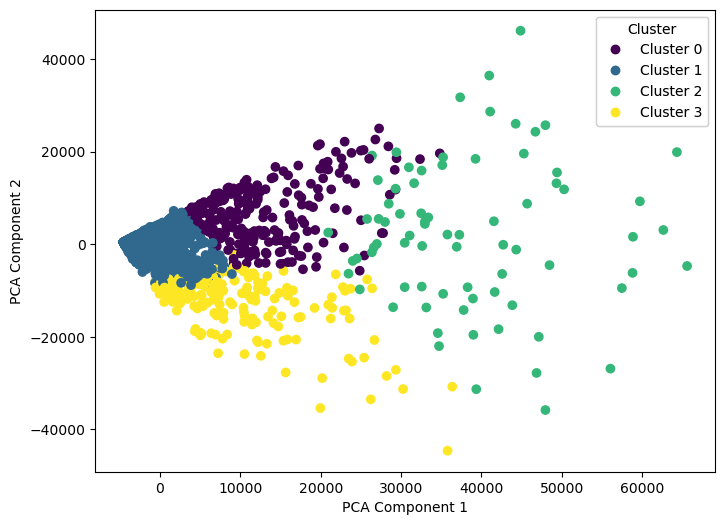

In [27]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Pivot the DataFrame to create a 3D array with entries as rows, features as columns, and dates as depth
user_data_3d = filtered_df.pivot(index='UserID', columns='Aggregate_Date', values=['Turnover', 'Hold', 'NumberofBets', 'YearofBirth', 'Interventiontype_first'])

# Fill missing values with zeros (if any)
user_data_3d = user_data_3d.fillna(0)

# Convert empty strings (' ') to float values of zero (0)
user_data_3d = user_data_3d.replace(' ', 0).astype(float)


user_data_3d = user_data_3d.astype(float)




# Convert the pivot table to a NumPy array
user_data_array = user_data_3d.to_numpy()

# Choose the number of clusters (k) based on your problem
k = 4 

# Perform K-means clustering
model = KMeans(n_clusters=k, random_state=0)
y_pred = model.fit_predict(user_data_array)

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
user_data_pca = pca.fit_transform(user_data_array)


# Visualize the clustered entries using PCA components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(user_data_pca[:, 0], user_data_pca[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')



    
cluster_dict={}

# Create a dictionary to store user IDs and cluster number
cluster_dict = {i: {'users': [], 'cluster_num': i} for i in range(k)}

# Loop through the cluster labels and append user IDs to the corresponding cluster
for user_id, cluster_label in zip(user_data_3d.index, y_pred):
    cluster_dict[cluster_label]['users'].append(user_id)

# Print the user IDs and cluster number in each cluster
for cluster_label, info in cluster_dict.items():
    print(f'Cluster {cluster_label} (Cluster {info["cluster_num"]}):\nUsers: {info["users"]}')
    
    
# Create a legend for the cluster numbers
legend_labels = [f'Cluster {info["cluster_num"]}' for info in cluster_dict.values()]
legend = plt.legend(handles=scatter.legend_elements()[0], title='Cluster', labels=legend_labels)
plt.gca().add_artist(legend)

plt.show()


In [28]:
user_31965 = filtered_df[filtered_df['UserID'] == 2609261]
print(user_31965)

         UserID  ProductType          Turnover               Hold  \
499010  2609261          2.0           31.3237            11.6164   
498823  2609261          2.0            0.5188            -0.0778   
498932  2609261          2.0           12.4516             2.4514   
499056  2609261          2.0           31.7803             0.2672   
499362  2609261          2.0           138.943           -10.7889   
...         ...          ...               ...                ...   
498991  2609261          2.0         49.328677          32.315723   
499550  2609261          2.0  582.529407319715   119.405052769452   
499542  2609261          2.0  356.580489156444  -91.3074733633913   
499503  2609261          2.0   460.53499911841   119.810584116269   
498849  2609261          2.0          2.680134            1.01267   

        NumberofBets Aggregate_Date  RG_case YearofBirth  RGsumevents  \
499010            27     2006-05-20        1        1971          1.0   
498823             1     

In [29]:
# user_test = user_data_3d.loc[107124]

# print(user_test)



In [30]:
# column_names = user_data_3d.columns
# print(column_names)

In [31]:
# user_data_pca

In [32]:
# y_pred

In [33]:
# # Visualize the clustered entries using 'Turnover' vs 'Hold'
# plt.figure(figsize=(8, 6))
# plt.scatter(user_data_array[:, 0], user_data_array[:, 1], c=y_pred, cmap='viridis')
# plt.xlabel('Turnover')
# plt.ylabel('Hold')
# plt.title('K-means Clustering: Turnover vs Hold')

# # Create a legend for the cluster numbers
# legend_labels = [f'Cluster {cluster_num}' for cluster_num in range(k)]
# legend = plt.legend(handles=scatter.legend_elements()[0], title='Cluster', labels=legend_labels)
# plt.gca().add_artist(legend)
# plt.show()



In [34]:
# # Visualize the clustered entries using 'Turnover' vs 'NumberofBets'
# plt.figure(figsize=(8, 6))
# plt.scatter(user_data_array[:, 0], user_data_array[:, 2], c=y_pred, cmap='viridis')
# plt.xlabel('Turnover')
# plt.ylabel('NumberofBets')
# plt.title('K-means Clustering: Turnover vs NumberofBets')

# # Create a legend for the cluster numbers
# legend_labels = [f'Cluster {cluster_num}' for cluster_num in range(k)]
# legend = plt.legend(handles=scatter.legend_elements()[0], title='Cluster', labels=legend_labels)
# plt.gca().add_artist(legend)

# plt.show()

In [35]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from ipywidgets import interact

from ipywidgets import interact, DatePicker

# Assuming user_data_array contains your data and y_pred contains cluster labels

# Define the date range based on your data


# Create a function to plot the clustering results for a specific time frame
def plot_clusters(time_frame):
    print(time_frame)
    start_date = '2002-11-12' #).date()
        # Extract the year from the time_frame and construct a new start_date
    start_year = str(int(time_frame))
    start_date = pd.to_datetime(start_year + '-11-12')
    
    plt.figure(figsize=(8, 6))
    plt.scatter(user_data_3d['NumberofBets'][start_date], user_data_3d['Hold'][start_date], c=y_pred, cmap='viridis')
   # plt.scatter(user_data_array[:, 0], user_data_array[:, 2], c=y_pred, cmap='viridis')
    plt.xlabel('NumberofBets')
    plt.ylabel('Hold')
    plt.title(f'K-means Clustering: NumberofBets vs Hold (Time Frame {time_frame})')
    
    # Filter data for the selected time frame and adjust the data_array and y_pred accordingly
    # For example, you can filter data based on dates
    # filtered_data_array = user_data_array[time_frame_condition]
    # filtered_y_pred = y_pred[time_frame_condition]
    
    # Scatter plot the filtered data
    # plt.scatter(filtered_data_array[:, 0], filtered_data_array[:, 2], c=filtered_y_pred, cmap='viridis')
    
    plt.show()
    

start_date='2002-11-12'
end_date='2010-11-10'




# Create the interaction using the date pickers
interact(plot_clusters, time_frame=(2002, 2010))

interactive(children=(IntSlider(value=2006, description='time_frame', max=2010, min=2002), Output()), _dom_cla…

<function __main__.plot_clusters(time_frame)>

In [36]:
#print(*user_data_3d.columns)


In [37]:
user_data_3d['Turnover']['2002-11-12']

UserID
31965      20.0
32639       0.0
36822       0.0
36916       0.0
74438       0.0
           ... 
9806890     0.0
9807483     0.0
9820476     0.0
9822065     0.0
9859152     0.0
Name: 2002-11-12 00:00:00, Length: 3161, dtype: float64

In [38]:
user_data_3d.columns
#2002-11-12 
#2010-11-10

MultiIndex([(              'Turnover', '2002-11-12'),
            (              'Turnover', '2002-11-13'),
            (              'Turnover', '2002-11-14'),
            (              'Turnover', '2002-11-15'),
            (              'Turnover', '2002-11-16'),
            (              'Turnover', '2002-11-17'),
            (              'Turnover', '2002-11-18'),
            (              'Turnover', '2002-11-19'),
            (              'Turnover', '2002-11-20'),
            (              'Turnover', '2002-11-22'),
            ...
            ('Interventiontype_first', '2010-11-01'),
            ('Interventiontype_first', '2010-11-02'),
            ('Interventiontype_first', '2010-11-03'),
            ('Interventiontype_first', '2010-11-04'),
            ('Interventiontype_first', '2010-11-05'),
            ('Interventiontype_first', '2010-11-06'),
            ('Interventiontype_first', '2010-11-07'),
            ('Interventiontype_first', '2010-11-08'),
            

In [39]:
user_data_3d

Turnover                                              \
Aggregate_Date 2002-11-12 2002-11-13 2002-11-14 2002-11-15 2002-11-16   
UserID                                                                  
31965                20.0        0.0      73.18       10.0     163.28   
32639                 0.0        0.0       0.00        0.0       0.00   
36822                 0.0        0.0       0.00        0.0       0.00   
36916                 0.0        0.0       0.00        0.0       0.00   
74438                 0.0        0.0       0.00        0.0       0.00   
...                   ...        ...        ...        ...        ...   
9806890               0.0        0.0       0.00        0.0       0.00   
9807483               0.0        0.0       0.00        0.0       0.00   
9820476               0.0        0.0       0.00        0.0       0.00   
9822065               0.0        0.0       0.00        0.0       0.00   
9859152               0.0        0.0       0.00        0.0       0.00   

                                                                       ...  \
Aggregate_Date 2002-11-17 2002-11-18 2002-11-19 2002-11-20 2002-11-22  ...   
UserID                                                                 ...   
31965              162.34      156.0       3.74       80.0        0.0  ...   
32639                0.00        0.0       0.00        0.0        0.0  ...   
36822                0.00        0.0       0.00        0.0        0.0  ...   
36916                0.00        0.0       0.00        0.0        0.0  ...   
74438                0.00        0.0       0.00        0.0        0.0  ...   
...                   ...        ...        ...        ...        ...  ...   
9806890              0.00        0.0       0.00        0.0        0.0  ...   
9807483              0.00        0.0       0.00        0.0        0.0  ...   
9820476              0.00        0.0       0.00        0.0        0.0  ...   
9822065              0.00        0.0       0.00        0.0        0.0  ...   
9859152              0.00        0.0       0.00        0.0        0.0  ...   

               Interventiontype_first                                   \
Aggregate_Date             2010-11-01 2010-11-02 2010-11-03 2010-11-04   
UserID                                                                   
31965                             0.0        0.0        0.0        8.0   
32639                             0.0        0.0        0.0        0.0   
36822                             0.0        0.0        0.0        0.0   
36916                             0.0        0.0        0.0        0.0   
74438                             0.0        0.0        0.0        0.0   
...                               ...        ...        ...        ...   
9806890                           0.0        0.0        0.0        0.0   
9807483                           0.0        0.0        0.0        0.0   
9820476                           0.0        0.0        0.0        0.0   
9822065                           0.0        0.0        0.0        0.0   
9859152                           0.0        0.0        0.0        0.0   

                                                                       \
Aggregate_Date 2010-11-05 2010-11-06 2010-11-07 2010-11-08 2010-11-09   
UserID                                                                  
31965                 0.0        8.0        0.0        0.0        0.0   
32639                 0.0        0.0        0.0        0.0        0.0   
36822                 0.0        0.0        0.0        0.0        0.0   
36916                 0.0        0.0        0.0        0.0        0.0   
74438                 0.0        0.0        0.0        0.0        0.0   
...                   ...        ...        ...        ...        ...   
9806890               0.0        0.0        0.0        0.0        0.0   
9807483               0.0        0.0        0.0        0.0        0.0   
9820476               0.0        0.0        0.0        0.0   

In [40]:
user_data_3d


Turnover                                              \
Aggregate_Date 2002-11-12 2002-11-13 2002-11-14 2002-11-15 2002-11-16   
UserID                                                                  
31965                20.0        0.0      73.18       10.0     163.28   
32639                 0.0        0.0       0.00        0.0       0.00   
36822                 0.0        0.0       0.00        0.0       0.00   
36916                 0.0        0.0       0.00        0.0       0.00   
74438                 0.0        0.0       0.00        0.0       0.00   
...                   ...        ...        ...        ...        ...   
9806890               0.0        0.0       0.00        0.0       0.00   
9807483               0.0        0.0       0.00        0.0       0.00   
9820476               0.0        0.0       0.00        0.0       0.00   
9822065               0.0        0.0       0.00        0.0       0.00   
9859152               0.0        0.0       0.00        0.0       0.00   

                                                                       ...  \
Aggregate_Date 2002-11-17 2002-11-18 2002-11-19 2002-11-20 2002-11-22  ...   
UserID                                                                 ...   
31965              162.34      156.0       3.74       80.0        0.0  ...   
32639                0.00        0.0       0.00        0.0        0.0  ...   
36822                0.00        0.0       0.00        0.0        0.0  ...   
36916                0.00        0.0       0.00        0.0        0.0  ...   
74438                0.00        0.0       0.00        0.0        0.0  ...   
...                   ...        ...        ...        ...        ...  ...   
9806890              0.00        0.0       0.00        0.0        0.0  ...   
9807483              0.00        0.0       0.00        0.0        0.0  ...   
9820476              0.00        0.0       0.00        0.0        0.0  ...   
9822065              0.00        0.0       0.00        0.0        0.0  ...   
9859152              0.00        0.0       0.00        0.0        0.0  ...   

               Interventiontype_first                                   \
Aggregate_Date             2010-11-01 2010-11-02 2010-11-03 2010-11-04   
UserID                                                                   
31965                             0.0        0.0        0.0        8.0   
32639                             0.0        0.0        0.0        0.0   
36822                             0.0        0.0        0.0        0.0   
36916                             0.0        0.0        0.0        0.0   
74438                             0.0        0.0        0.0        0.0   
...                               ...        ...        ...        ...   
9806890                           0.0        0.0        0.0        0.0   
9807483                           0.0        0.0        0.0        0.0   
9820476                           0.0        0.0        0.0        0.0   
9822065                           0.0        0.0        0.0        0.0   
9859152                           0.0        0.0        0.0        0.0   

                                                                       \
Aggregate_Date 2010-11-05 2010-11-06 2010-11-07 2010-11-08 2010-11-09   
UserID                                                                  
31965                 0.0        8.0        0.0        0.0        0.0   
32639                 0.0        0.0        0.0        0.0        0.0   
36822                 0.0        0.0        0.0        0.0        0.0   
36916                 0.0        0.0        0.0        0.0        0.0   
74438                 0.0        0.0        0.0        0.0        0.0   
...                   ...        ...        ...        ...        ...   
9806890               0.0        0.0        0.0        0.0        0.0   
9807483               0.0        0.0        0.0        0.0        0.0   
9820476               0.0        0.0        0.0        0.0   

In [41]:
user_id = 36822

user_data_for_user1 = user_data_3d.loc[user_id, :]
print("Data for user 1 for all dates:", user_data_for_user1)

Data for user 1 for all dates:                         Aggregate_Date
Turnover                2002-11-12        0.0
                        2002-11-13        0.0
                        2002-11-14        0.0
                        2002-11-15        0.0
                        2002-11-16        0.0
                                         ... 
Interventiontype_first  2010-11-06        0.0
                        2010-11-07        0.0
                        2010-11-08        0.0
                        2010-11-09        0.0
                        2010-11-10        0.0
Name: 36822, Length: 14570, dtype: float64


In [42]:
print(user_data_for_user1)

                        Aggregate_Date
Turnover                2002-11-12        0.0
                        2002-11-13        0.0
                        2002-11-14        0.0
                        2002-11-15        0.0
                        2002-11-16        0.0
                                         ... 
Interventiontype_first  2010-11-06        0.0
                        2010-11-07        0.0
                        2010-11-08        0.0
                        2010-11-09        0.0
                        2010-11-10        0.0
Name: 36822, Length: 14570, dtype: float64


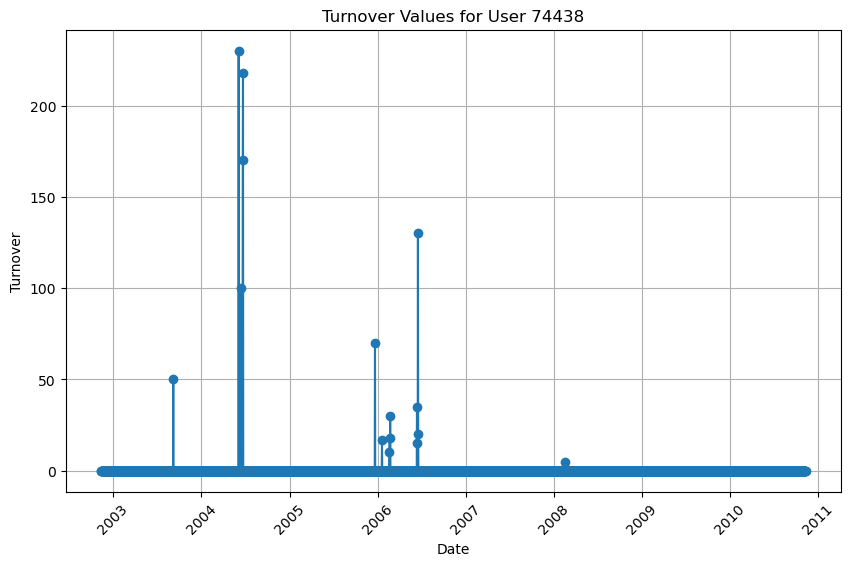

In [43]:
import matplotlib.pyplot as plt

user_id = 74438
user_data_for_user1 = user_data_3d.loc[user_id, 'Turnover']

# Extract the turnover values
turnover_values = user_data_for_user1.to_numpy()

# Extract the corresponding date indices
dates = user_data_for_user1.index.get_level_values('Aggregate_Date')

# Plot the turnover values against dates
plt.figure(figsize=(10, 6))
plt.plot(dates, turnover_values, marker='o', linestyle='-')
plt.title(f'Turnover Values for User {user_id}')
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.grid(True)
plt.show()


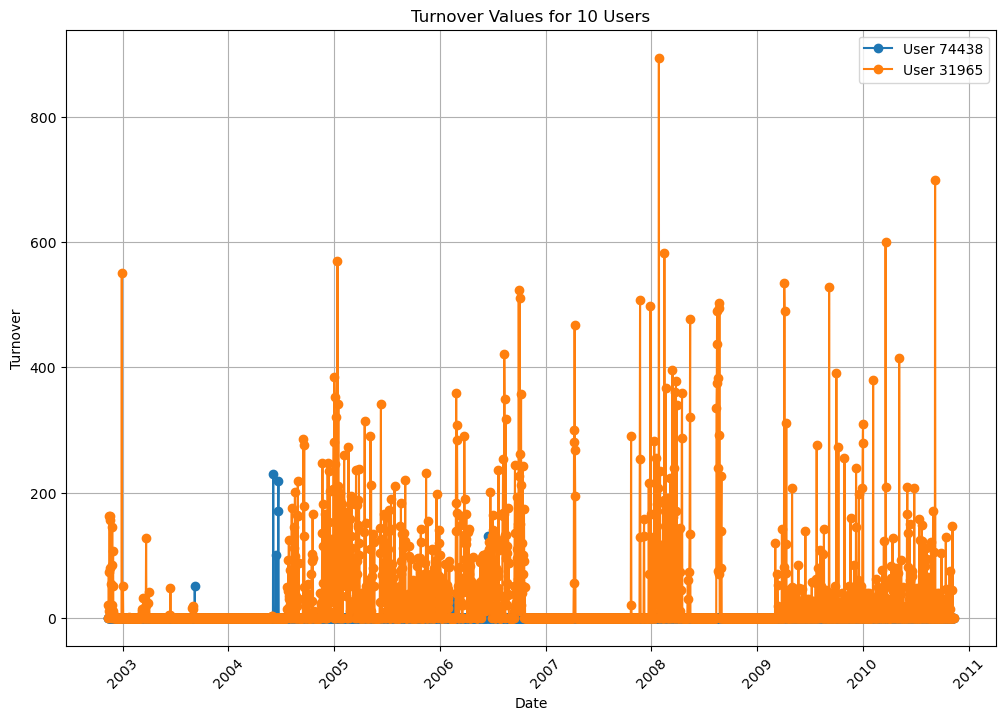

In [44]:
import matplotlib.pyplot as plt

# List of 10 user IDs to plot
user_ids_to_plot = [74438,31965] 

# Create a subplot for the graph
plt.figure(figsize=(12, 8))
plt.title('Turnover Values for 10 Users')
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.grid(True)

for user_id in user_ids_to_plot:
    
#     user_data_for_user1 = user_data_3d.loc[user_id, 'Turnover']

# # Extract the turnover values
# turnover_values = user_data_for_user1.to_numpy()

# # Extract the corresponding date indices
# dates = user_data_for_user1.index.get_level_values('Aggregate_Date')

    
    
    user_data_for_user = user_data_3d.loc[user_id, 'Turnover']
    
    # Extract the turnover values
    turnover_values = user_data_for_user.to_numpy()
    
    # Extract the corresponding date indices
    dates = user_data_for_user.index.get_level_values('Aggregate_Date')
    
    # Plot the turnover values against dates
    plt.plot(dates, turnover_values, marker='o', linestyle='-', label=f'User {user_id}')

# Add a legend to differentiate the users
plt.legend(loc='upper right')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [45]:
user_data_array #[user_data_3d['UserID']=='31965']

array([[20.  ,  0.  , 73.18, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [46]:
# testing k means with dummy data

In [47]:


# # Sample DataFrame (replace this with your actual DataFrame)
# user_agg = pd.DataFrame({
#     'user_id': [1, 1, 3, 2, 3, 3, 4, 5],
#     'date': ['2023-01-01', '2023-01-02', '2023-01-09', '2023-01-04', '2023-01-01', '2023-01-04', '2023-01-03', '2023-01-02'],
#     'turnover': [10.5, 12.0, 8.0, 9.0, 15.0, 14.5, 15.0, 14.5],
#     'hold': [20.0, 21.0, 18.0, 19.0, 25.0, 24.5, 15.0, 14.5],
#     'loss': [5.0, 4.0, 3.0, 2.0, 1.5, 2.5, 15.0, 14.5],
#     'amountinvested': [100.0, 110.0, 95.0, 105.0, 120.0, 130.0, 15.0, 14.5],
#     'rgtype': [1, 2, 1, 1, 2, 2, 1, 3]
# })

# # Convert the 'date' column to a datetime object
# user_agg['date'] = pd.to_datetime(user_agg['date'])

# # Sort the DataFrame by 'user_id' and 'date'
# user_agg_sorted = user_agg.sort_values(by=['user_id', 'date'])

# # Pivot the DataFrame to create a 3D array with entries as rows, features as columns, and dates as depth
# user_data_3d = user_agg.pivot(index='user_id', columns='date', values=['turnover', 'hold', 'loss', 'amountinvested', 'rgtype'])

# # Fill missing values with zeros (if any)
# user_data_3d = user_data_3d.fillna(0)

# # Convert the pivot table to a NumPy array
# user_data_array = user_data_3d.to_numpy()

# # Choose the number of clusters (k) based on your problem
# k = 3  

# # Perform K-means clustering
# model = KMeans(n_clusters=k, random_state=0)
# y_pred = model.fit_predict(user_data_array)

# # Apply PCA to reduce dimensionality to 2D
# pca = PCA(n_components=2)
# user_data_pca = pca.fit_transform(user_data_array)


# # Visualize the clustered entries using PCA components
# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(user_data_pca[:, 0], user_data_pca[:, 1], c=y_pred, cmap='viridis')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')


# # Create a legend for the cluster numbers
# legend_labels = [f'Cluster {info["cluster_num"]}' for info in cluster_dict.values()]
# legend = plt.legend(handles=scatter.legend_elements()[0], title='Cluster', labels=legend_labels)
# plt.gca().add_artist(legend)

# plt.show()
    

# # # Create a dictionary to store user IDs and cluster number
# # cluster_dict = {i: {'users': [], 'cluster_num': i} for i in range(k)}

# # # Loop through the cluster labels and append user IDs to the corresponding cluster
# # for user_id, cluster_label in zip(user_agg['user_id'], y_pred):
# #     cluster_dict[cluster_label]['users'].append(user_id)

# # # Print the user IDs and cluster number in each cluster
# # for cluster_label, info in cluster_dict.items():
# #     print(f'Cluster {cluster_label} (Cluster {info["cluster_num"]}):\nUsers: {info["users"]}')


# # Create a dictionary to store user IDs and cluster number
# cluster_dict = {i: {'users': [], 'cluster_num': i} for i in range(k)}

# # Loop through the cluster labels and append user IDs to the corresponding cluster
# for user_id, cluster_label in zip(user_data_3d.index, y_pred):
#     cluster_dict[cluster_label]['users'].append(user_id)

# # Print the user IDs and cluster number in each cluster
# for cluster_label, info in cluster_dict.items():
#     print(f'Cluster {cluster_label} (Cluster {info["cluster_num"]}):\nUsers: {info["users"]}')


In [48]:
user_data_3d

Turnover                                              \
Aggregate_Date 2002-11-12 2002-11-13 2002-11-14 2002-11-15 2002-11-16   
UserID                                                                  
31965                20.0        0.0      73.18       10.0     163.28   
32639                 0.0        0.0       0.00        0.0       0.00   
36822                 0.0        0.0       0.00        0.0       0.00   
36916                 0.0        0.0       0.00        0.0       0.00   
74438                 0.0        0.0       0.00        0.0       0.00   
...                   ...        ...        ...        ...        ...   
9806890               0.0        0.0       0.00        0.0       0.00   
9807483               0.0        0.0       0.00        0.0       0.00   
9820476               0.0        0.0       0.00        0.0       0.00   
9822065               0.0        0.0       0.00        0.0       0.00   
9859152               0.0        0.0       0.00        0.0       0.00   

                                                                       ...  \
Aggregate_Date 2002-11-17 2002-11-18 2002-11-19 2002-11-20 2002-11-22  ...   
UserID                                                                 ...   
31965              162.34      156.0       3.74       80.0        0.0  ...   
32639                0.00        0.0       0.00        0.0        0.0  ...   
36822                0.00        0.0       0.00        0.0        0.0  ...   
36916                0.00        0.0       0.00        0.0        0.0  ...   
74438                0.00        0.0       0.00        0.0        0.0  ...   
...                   ...        ...        ...        ...        ...  ...   
9806890              0.00        0.0       0.00        0.0        0.0  ...   
9807483              0.00        0.0       0.00        0.0        0.0  ...   
9820476              0.00        0.0       0.00        0.0        0.0  ...   
9822065              0.00        0.0       0.00        0.0        0.0  ...   
9859152              0.00        0.0       0.00        0.0        0.0  ...   

               Interventiontype_first                                   \
Aggregate_Date             2010-11-01 2010-11-02 2010-11-03 2010-11-04   
UserID                                                                   
31965                             0.0        0.0        0.0        8.0   
32639                             0.0        0.0        0.0        0.0   
36822                             0.0        0.0        0.0        0.0   
36916                             0.0        0.0        0.0        0.0   
74438                             0.0        0.0        0.0        0.0   
...                               ...        ...        ...        ...   
9806890                           0.0        0.0        0.0        0.0   
9807483                           0.0        0.0        0.0        0.0   
9820476                           0.0        0.0        0.0        0.0   
9822065                           0.0        0.0        0.0        0.0   
9859152                           0.0        0.0        0.0        0.0   

                                                                       \
Aggregate_Date 2010-11-05 2010-11-06 2010-11-07 2010-11-08 2010-11-09   
UserID                                                                  
31965                 0.0        8.0        0.0        0.0        0.0   
32639                 0.0        0.0        0.0        0.0        0.0   
36822                 0.0        0.0        0.0        0.0        0.0   
36916                 0.0        0.0        0.0        0.0        0.0   
74438                 0.0        0.0        0.0        0.0        0.0   
...                   ...        ...        ...        ...        ...   
9806890               0.0        0.0        0.0        0.0        0.0   
9807483               0.0        0.0        0.0        0.0        0.0   
9820476               0.0        0.0        0.0        0.0   

In [49]:
# user_id = 1
# date = pd.to_datetime('2023-01-01')
# turnover_value = user_data_3d.loc[user_id, ('turnover', date)]
# print("Turnover for user 1 on 2023-01-01:", turnover_value)


In [50]:
print(y_pred)

[3 1 1 ... 1 1 1]


In [51]:
filtered_df

,UserID,ProductType,Turnover,Hold,NumberofBets,Aggregate_Date,RG_case,YearofBirth,RGsumevents,Event_type_first,Interventiontype_first
402,31965,2.0,20.0,20.0,1,2002-11-12,1,1971,1.0,2.0,8
1002,31965,2.0,73.18,18.96,6,2002-11-14,1,1971,1.0,2.0,8
403,31965,2.0,10.0,10.0,1,2002-11-15,1,1971,1.0,2.0,8
1217,31965,2.0,163.28,19.0,9,2002-11-16,1,1971,1.0,2.0,8
1331,31965,2.0,162.34,-97.5,13,2002-11-17,1,1971,1.0,2.0,8
...,...,...,...,...,...,...,...,...,...,...,...
973451,9822065,2.0,10.0,10.0,1,2010-02-09,1,1963,1.0,4.0,13
973463,9822065,2.0,15.0,-3.35,1,2010-03-02,1,1963,1.0,4.0,13
973452,9822065,2.0,1.0,1.0,1,2010-04-21,1,1963,1.0,4.0,13
973456,9822065,2.0,1.0,-2.8,1,2010-06-10,1,1963,1.0,4.0,13


In [52]:
# features to consider : turnover, hold , number of bets for time series prediction

In [53]:
moderate_addicted_players= [107124, 109445, 332091, 403944, 420681, 535025, 676437, 708122, 717922, 731018, 734038, 839105, 893392, 905798, 986289, 1054028, 1055097, 1128286, 1191883, 1205205, 1280671, 1301389, 1321102, 1330470, 1362354, 1376503, 1444002, 1444690, 1458694, 1467720, 1476237, 1575816, 1613141, 1691317, 1741128, 1745784, 1792037, 1812446, 1834053, 1866785, 1886970, 2015501, 2027653, 2037459, 2059854, 2107517, 2117010, 2150296, 2215644, 2251748, 2258689, 2299626, 2312117, 2510850, 2560163, 2566614, 2580478, 2595325, 2606689, 2614721, 2685297, 2689756, 2710254, 2783309, 2787151, 2794275, 2803911, 2832999, 2912319, 2930403, 2947836, 2983951, 2999195, 2999207, 3033642, 3176106, 3186379, 3302342, 3315310, 3424027, 3431103, 3438352, 3457670, 3458145, 3461699, 3474092, 3495839, 3496350, 3517053, 3559230, 3566841, 3618875, 3622203, 3636161, 3688036, 3776825, 3805497, 3810030, 3841216, 3858441, 3904166, 3914709, 4010854, 4022654, 4039888, 4136167, 4161293, 4214808, 4223135, 4227877, 4241294, 4267728, 4301894, 4338065, 4342173, 4343190, 4348335, 4361395, 4364542, 4391886, 4432017, 4475391, 4523711, 4526190, 4579343, 4597571, 4600997, 4608302, 4686195, 4734610, 4738703, 4754574, 4778231, 4837595, 4867029, 4867936, 4882865, 4890437, 4909756, 4932146, 4963002, 4996838, 5021938, 5046922, 5133765, 5160540, 5164325, 5313336, 5320445, 5326898, 5345825, 5372244, 5549778, 5554333, 5560128, 5592984, 5670707, 5678031, 5678852, 5781728, 5825306, 5826900, 5833825, 5857632, 5911218, 5961595, 5962099, 5962652, 5986101, 6055498, 6086787, 6126648, 6175402, 6176615, 6203853, 6206370, 6210682, 6216479, 6217359, 6237966, 6239380, 6283338, 6286166, 6353958, 6363863, 6392668, 6395232, 6427788, 6462869, 6465687, 6485628, 6562294, 6577298, 6606784, 6649792, 6691324, 6698316, 6703614, 6709379, 6727436, 6818258, 6826846, 6860191, 6872908, 6875004, 6884788, 7015624, 7062960, 7069475, 7092024, 7139334, 7153205, 7165714, 7192925, 7193066, 7196221, 7260144, 7289279, 7318774, 7332704, 7335300, 7339107, 7390814, 7403363, 7462955, 7472343, 7505656, 7505796, 7606420, 7729448, 7831028, 8026715, 8037545, 8148005, 8182233, 8381254, 8495659, 8582643, 8656794, 8804356, 8933678, 9065100, 9099550]
count = len(moderate_addicted_players)
print("Count of moderate addicted players:", count)


Count of moderate addicted players: 243


In [54]:
user_data_3d

Turnover                                              \
Aggregate_Date 2002-11-12 2002-11-13 2002-11-14 2002-11-15 2002-11-16   
UserID                                                                  
31965                20.0        0.0      73.18       10.0     163.28   
32639                 0.0        0.0       0.00        0.0       0.00   
36822                 0.0        0.0       0.00        0.0       0.00   
36916                 0.0        0.0       0.00        0.0       0.00   
74438                 0.0        0.0       0.00        0.0       0.00   
...                   ...        ...        ...        ...        ...   
9806890               0.0        0.0       0.00        0.0       0.00   
9807483               0.0        0.0       0.00        0.0       0.00   
9820476               0.0        0.0       0.00        0.0       0.00   
9822065               0.0        0.0       0.00        0.0       0.00   
9859152               0.0        0.0       0.00        0.0       0.00   

                                                                       ...  \
Aggregate_Date 2002-11-17 2002-11-18 2002-11-19 2002-11-20 2002-11-22  ...   
UserID                                                                 ...   
31965              162.34      156.0       3.74       80.0        0.0  ...   
32639                0.00        0.0       0.00        0.0        0.0  ...   
36822                0.00        0.0       0.00        0.0        0.0  ...   
36916                0.00        0.0       0.00        0.0        0.0  ...   
74438                0.00        0.0       0.00        0.0        0.0  ...   
...                   ...        ...        ...        ...        ...  ...   
9806890              0.00        0.0       0.00        0.0        0.0  ...   
9807483              0.00        0.0       0.00        0.0        0.0  ...   
9820476              0.00        0.0       0.00        0.0        0.0  ...   
9822065              0.00        0.0       0.00        0.0        0.0  ...   
9859152              0.00        0.0       0.00        0.0        0.0  ...   

               Interventiontype_first                                   \
Aggregate_Date             2010-11-01 2010-11-02 2010-11-03 2010-11-04   
UserID                                                                   
31965                             0.0        0.0        0.0        8.0   
32639                             0.0        0.0        0.0        0.0   
36822                             0.0        0.0        0.0        0.0   
36916                             0.0        0.0        0.0        0.0   
74438                             0.0        0.0        0.0        0.0   
...                               ...        ...        ...        ...   
9806890                           0.0        0.0        0.0        0.0   
9807483                           0.0        0.0        0.0        0.0   
9820476                           0.0        0.0        0.0        0.0   
9822065                           0.0        0.0        0.0        0.0   
9859152                           0.0        0.0        0.0        0.0   

                                                                       \
Aggregate_Date 2010-11-05 2010-11-06 2010-11-07 2010-11-08 2010-11-09   
UserID                                                                  
31965                 0.0        8.0        0.0        0.0        0.0   
32639                 0.0        0.0        0.0        0.0        0.0   
36822                 0.0        0.0        0.0        0.0        0.0   
36916                 0.0        0.0        0.0        0.0        0.0   
74438                 0.0        0.0        0.0        0.0        0.0   
...                   ...        ...        ...        ...        ...   
9806890               0.0        0.0        0.0        0.0        0.0   
9807483               0.0        0.0        0.0        0.0        0.0   
9820476               0.0        0.0        0.0        0.0   

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Create a dictionary to store user IDs and their corresponding 'is_stationary' values
is_stationary_data = {'UserID': moderate_addicted_players, 'is_stationary': []}

# Iterate through the list of user IDs
for user_id in moderate_addicted_players:
    # Extract the user's turnover data
    user_turnover = user_data_3d['Turnover'][user_data_3d.index == user_id].values.ravel()
    
    # Perform the ADF user_data_3d_timeseries_stationarity_check
    result = adfuller(user_turnover)
    
    # Check if the time series is stationary based on the p-value
    if result[1] <= 0.05:
        is_stationary = 1  # Stationary
    else:
        is_stationary = 0  # Not stationary
    
    # Append the 'is_stationary' value to the list
    is_stationary_data['is_stationary'].append(is_stationary)

# Create a new DataFrame from the dictionary
is_stationary_df = pd.DataFrame(is_stationary_data)

# Print the new DataFrame
print(is_stationary_df)


      UserID  is_stationary
0     107124              1
1     109445              1
2     332091              1
3     403944              1
4     420681              1
..       ...            ...
238  8656794              1
239  8804356              1
240  8933678              1
241  9065100              1
242  9099550              1

[243 rows x 2 columns]


In [56]:
is_stationary_df['is_stationary'].value_counts()


1    235
0      8
Name: is_stationary, dtype: int64

In [57]:
arimausers=is_stationary_df[is_stationary_df['is_stationary']==1]
user_data_3d['Turnover']
x_single_user_turnover=user_data_3d['Turnover'][user_data_3d.index == arimausers['UserID'][1]] #[arimausers['UserID'][1]] 

In [58]:
x_single_user_turnover#[x_single_user_turnover['UserID']=='800']

Aggregate_Date,2002-11-12,2002-11-13,2002-11-14,2002-11-15,2002-11-16,2002-11-17,2002-11-18,2002-11-19,2002-11-20,2002-11-22,...,2010-11-01,2010-11-02,2010-11-03,2010-11-04,2010-11-05,2010-11-06,2010-11-07,2010-11-08,2010-11-09,2010-11-10
UserID,,,,,,,,,,,,,,,,,,,,,
109445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,856.02,281.88,636.0,0.0,0.0,17.28,4.91,0.0


In [59]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt
# import pandas as pd

# arimausers

# x_single_user_turnover=user_data_3d['Turnover'][user_data_3d.index == arimausers['UserID'][3]]
# x_single_user_turnover.describe
# x_single_user_turnover_ravel=x_single_user_turnover.values.ravel()
# x_single_user_turnover_ravel


# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.stattools import adfuller


# # Plot the time series to visualize it
# plt.plot(x_single_user_turnover_ravel)
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.title('Time Series Data')
# plt.show()





# frequency = 'D'  # Daily frequency

# start_date='2002-11-12'
# end_date='2010-11-10'



# # Create a time index for your data
# time_index = pd.date_range(start=start_date, periods=len(x_single_user_turnover_ravel), freq=frequency)


# # Scale the data
# scaler = MinMaxScaler(feature_range=(0, 1))
# x_single_user_turnover_ravel_scaled = scaler.fit_transform(x_single_user_turnover_ravel.reshape(-1, 1))

# # Split the data into training and test sets
# split_ratio = 0.99  # 80% for training, 20% for testing
# split_index = int(len(x_single_user_turnover_ravel) * split_ratio)

# train_data = x_single_user_turnover_ravel_scaled[:split_index]
# test_data = x_single_user_turnover_ravel_scaled[split_index:]


# # Create a time index for your data
# time_index_train = pd.date_range(start=start_date, periods=len(train_data), freq=frequency)


# # Create a time index for your data
# time_index_test = pd.date_range(start=time_index_train[-1], periods=len(test_data), freq=frequency)



# # Define the SARIMA model with seasonal difference and order
# model_sarima_monthly = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 14))

# # Fit the model to the training data
# FITmodel_sarima_monthly = model_sarima_monthly.fit()

# # Forecast the test series
# FITmodel_sarima_monthly_forecast = FITmodel_sarima_monthly.forecast(steps= len(test_data))

# # Inverse scale the forecasted values
# FITmodel_sarima_monthly_forecast = scaler.inverse_transform(FITmodel_sarima_monthly_forecast.reshape(-1, 1)).reshape(-1)


# # Inverse scale the training data
# train_data_inverse = scaler.inverse_transform(train_data.reshape(-1, 1)).reshape(-1)

# # Inverse scale the test data
# test_data_inverse = scaler.inverse_transform(test_data.reshape(-1, 1)).reshape(-1)


# # Plot the forecast
# plt.figure(figsize=(12, 6))
# plt.plot(time_index_train, train_data_inverse, label='Train', color='blue')
# forecast_dates = pd.date_range(start=time_index_train[-1], periods=len(test_data), freq=frequency)  # Adjust as needed
# plt.plot(time_index_test, test_data_inverse, label='Test', color='orange')
# plt.plot(forecast_dates, FITmodel_sarima_monthly_forecast, label='Forecast', color='green')
# plt.xlabel('Time')
# plt.ylabel('Turnover')
# plt.legend()
# plt.title('SARIMA Forecast')
# plt.show()


# plt.figure(figsize=(12, 6))
# plt.plot(time_index_train[-48:], train_data_inverse[-48:], label='Train', color='blue', marker='o')
# plt.plot(time_index_test, test_data_inverse, label='Test', color='orange')
# plt.plot(forecast_dates, FITmodel_sarima_monthly_forecast, label='Forecast', color='green', marker='o')
# plt.xlabel('Time')
# plt.ylabel('Turnover')
# plt.legend()
# plt.title('Zoomed-in SARIMA Forecast vs Actual')
# plt.show()



# from sklearn.metrics import mean_squared_error, accuracy_score

# # Calculate predictions for training and testing data
# train_predictions = FITmodel_sarima_monthly.predict(start=0, end=split_index-1)
# test_predictions = FITmodel_sarima_monthly_forecast

# # Trim the predicted values to match the length of the actual values
# test_predictions_inverse_trimmed = test_predictions_inverse[:len(test_actual_inverse)]

# # Calculate RMSE for training and testing
# rmse_train = mean_squared_error(train_actual_inverse, train_predictions_inverse, squared=False)
# rmse_test = mean_squared_error(test_actual_inverse, test_predictions_inverse_trimmed, squared=False)


# # Display results
# print(f"RMSE (Training): {rmse_train}")
# print(f"RMSE (Testing): {rmse_test}")



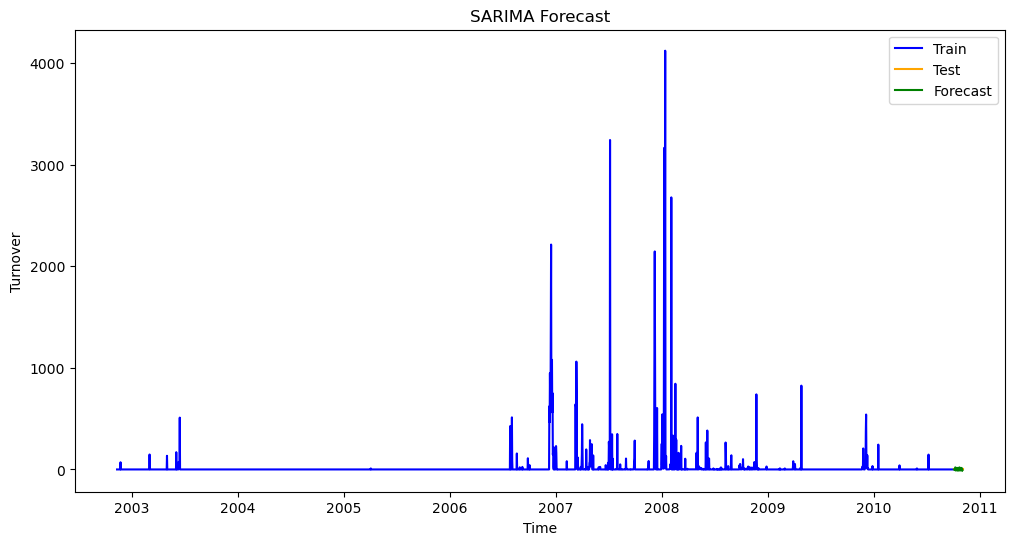

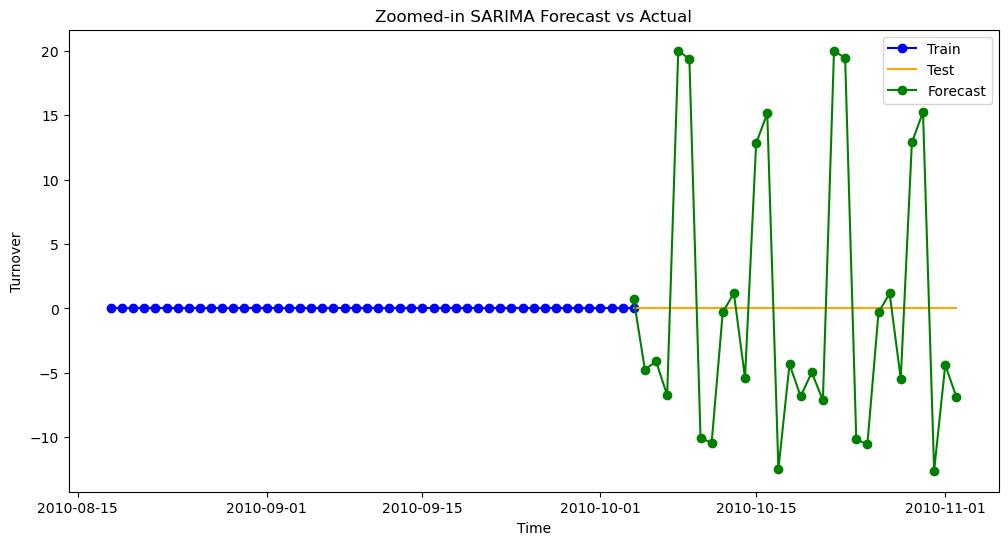

User 107124:
RMSE (Training): 169.02448115940072
RMSE (Testing): 10.70189696567162
Surge started right before: 2010-10-05 00:00:00
Surge started right before: 2010-10-07 00:00:00
Surge started right before: 2010-10-11 00:00:00
Surge started right before: 2010-10-12 00:00:00
Surge started right before: 2010-10-14 00:00:00
Surge started right before: 2010-10-15 00:00:00
Surge started right before: 2010-10-17 00:00:00
Surge started right before: 2010-10-19 00:00:00
Surge started right before: 2010-10-21 00:00:00
Surge started right before: 2010-10-25 00:00:00
Surge started right before: 2010-10-26 00:00:00
Surge started right before: 2010-10-28 00:00:00
Surge started right before: 2010-10-29 00:00:00
Surge started right before: 2010-10-31 00:00:00


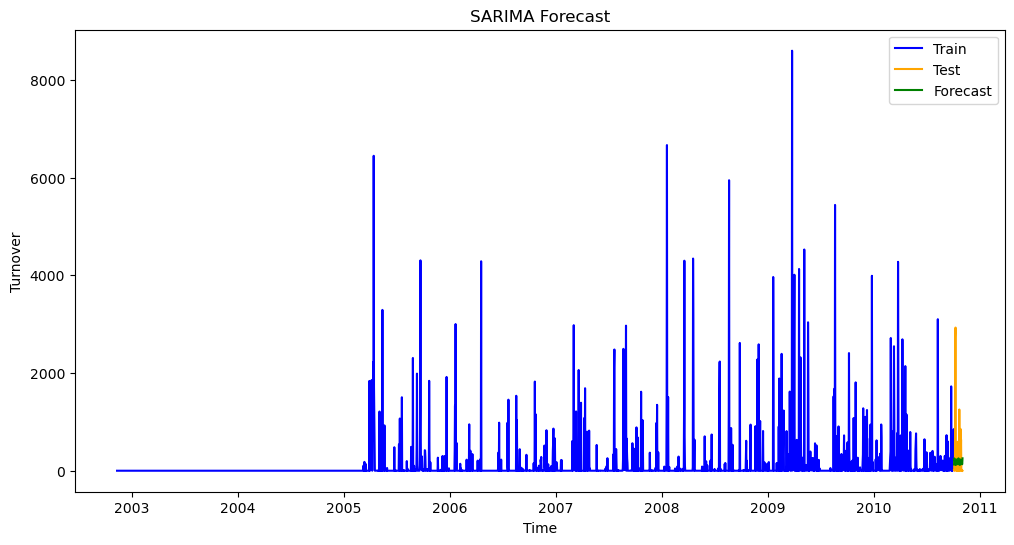

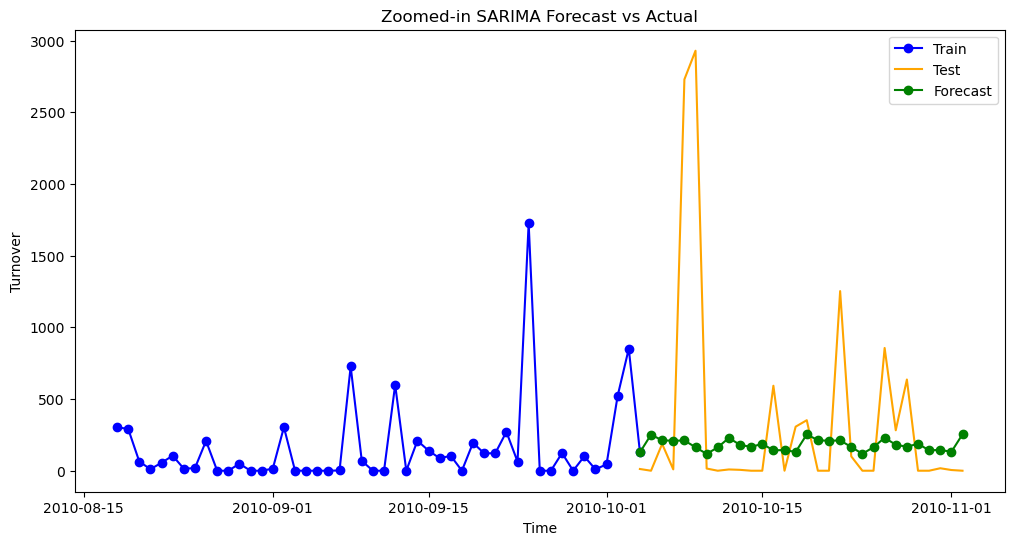

User 109445:
RMSE (Training): 516.2393196824131
RMSE (Testing): 742.5132211953328
Surge started right before: 2010-10-07 00:00:00
Surge started right before: 2010-10-10 00:00:00
Surge started right before: 2010-10-11 00:00:00
Surge started right before: 2010-10-14 00:00:00
Surge started right before: 2010-10-16 00:00:00
Surge started right before: 2010-10-18 00:00:00
Surge started right before: 2010-10-21 00:00:00
Surge started right before: 2010-10-24 00:00:00
Surge started right before: 2010-10-25 00:00:00
Surge started right before: 2010-10-28 00:00:00
Surge started right before: 2010-10-30 00:00:00
Surge started right before: 2010-11-01 00:00:00


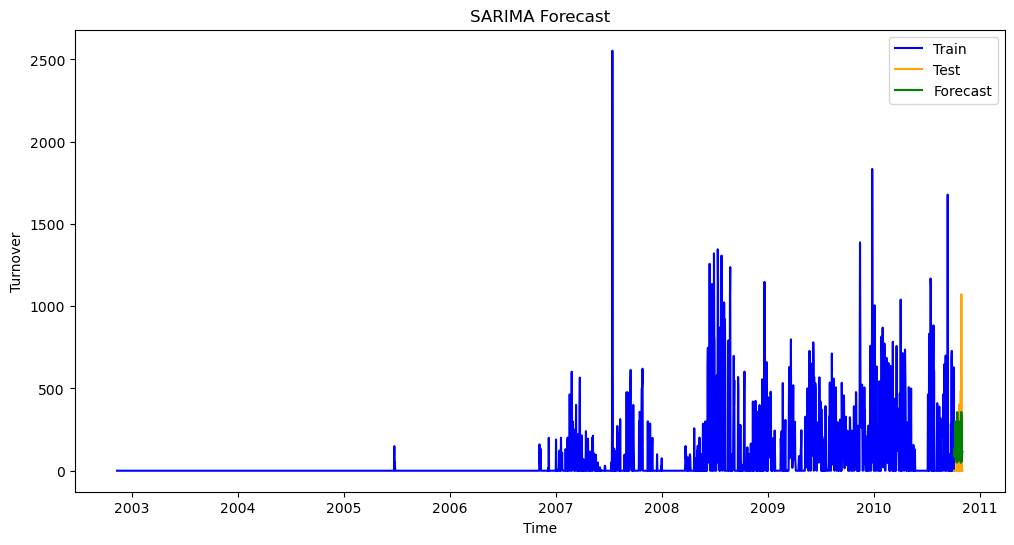

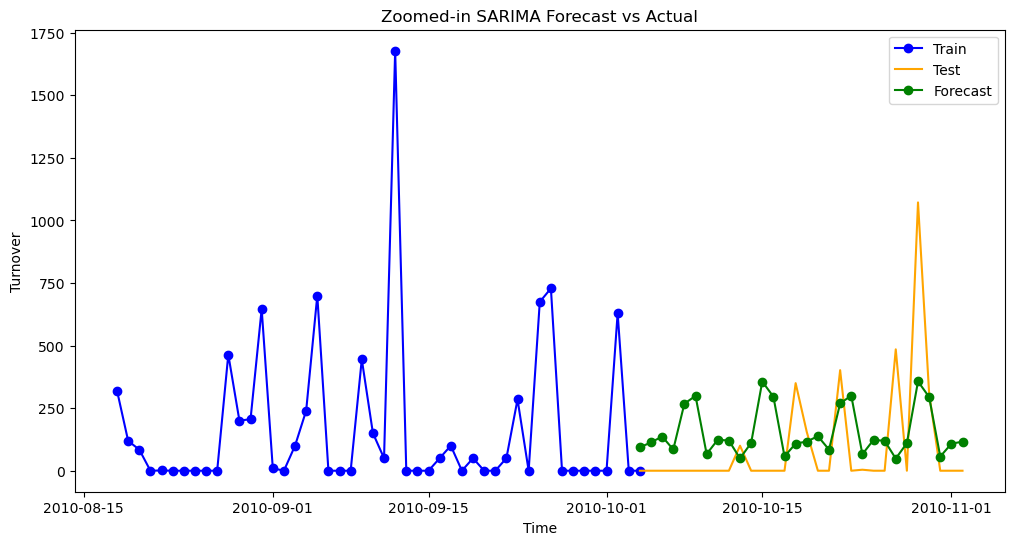

User 332091:
RMSE (Training): 186.4582233189498
RMSE (Testing): 219.47577201389979
Surge started right before: 2010-10-05 00:00:00
Surge started right before: 2010-10-07 00:00:00
Surge started right before: 2010-10-08 00:00:00
Surge started right before: 2010-10-10 00:00:00
Surge started right before: 2010-10-13 00:00:00
Surge started right before: 2010-10-14 00:00:00
Surge started right before: 2010-10-17 00:00:00
Surge started right before: 2010-10-18 00:00:00
Surge started right before: 2010-10-19 00:00:00
Surge started right before: 2010-10-21 00:00:00
Surge started right before: 2010-10-22 00:00:00
Surge started right before: 2010-10-24 00:00:00
Surge started right before: 2010-10-27 00:00:00
Surge started right before: 2010-10-28 00:00:00
Surge started right before: 2010-10-31 00:00:00
Surge started right before: 2010-11-01 00:00:00


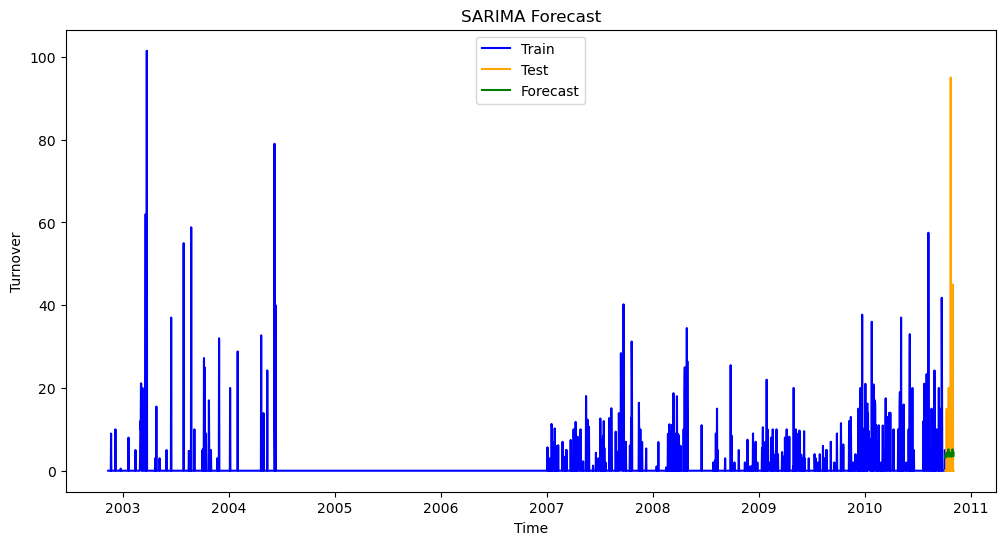

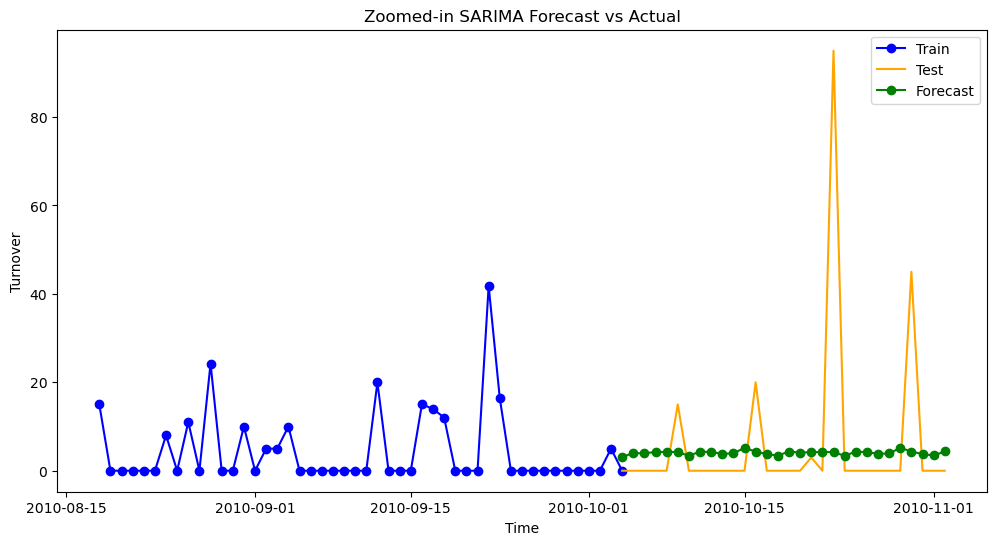

User 403944:
RMSE (Training): 5.241140696522583
RMSE (Testing): 18.858171954244906
Surge started right before: 2010-10-10 00:00:00
Surge started right before: 2010-10-14 00:00:00
Surge started right before: 2010-10-18 00:00:00
Surge started right before: 2010-10-24 00:00:00
Surge started right before: 2010-10-28 00:00:00
Surge started right before: 2010-11-01 00:00:00


C:\Users\abhiv\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


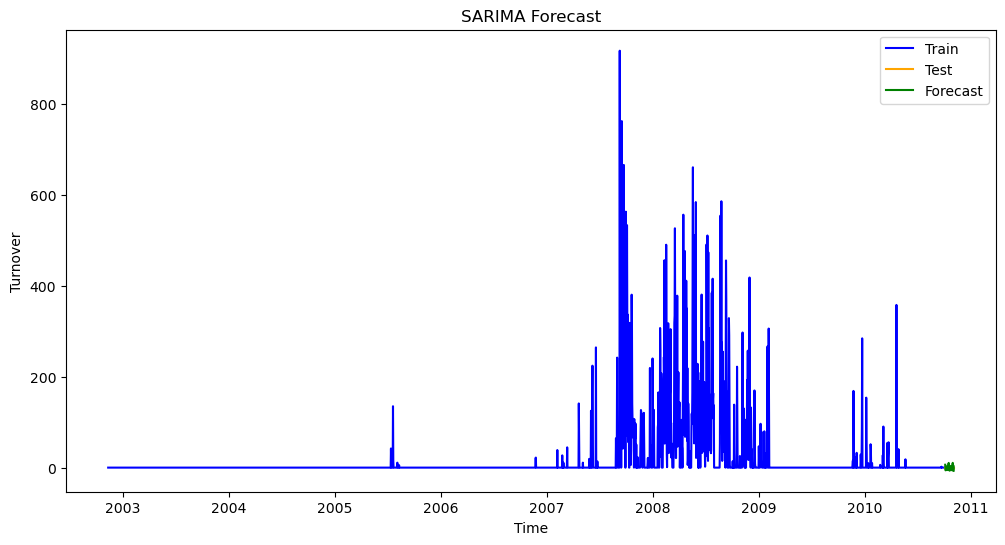

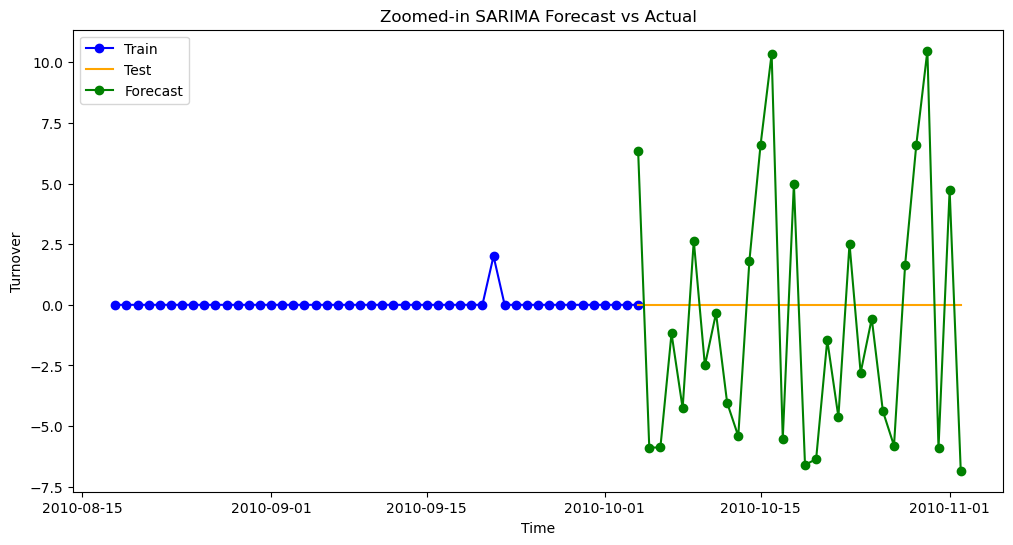

User 420681:
RMSE (Training): 74.26231912355261
RMSE (Testing): 5.264223082868238
Surge started right before: 2010-10-06 00:00:00
Surge started right before: 2010-10-08 00:00:00
Surge started right before: 2010-10-10 00:00:00
Surge started right before: 2010-10-13 00:00:00
Surge started right before: 2010-10-14 00:00:00
Surge started right before: 2010-10-15 00:00:00
Surge started right before: 2010-10-17 00:00:00
Surge started right before: 2010-10-20 00:00:00
Surge started right before: 2010-10-22 00:00:00
Surge started right before: 2010-10-24 00:00:00
Surge started right before: 2010-10-27 00:00:00
Surge started right before: 2010-10-28 00:00:00
Surge started right before: 2010-10-29 00:00:00
Surge started right before: 2010-10-31 00:00:00


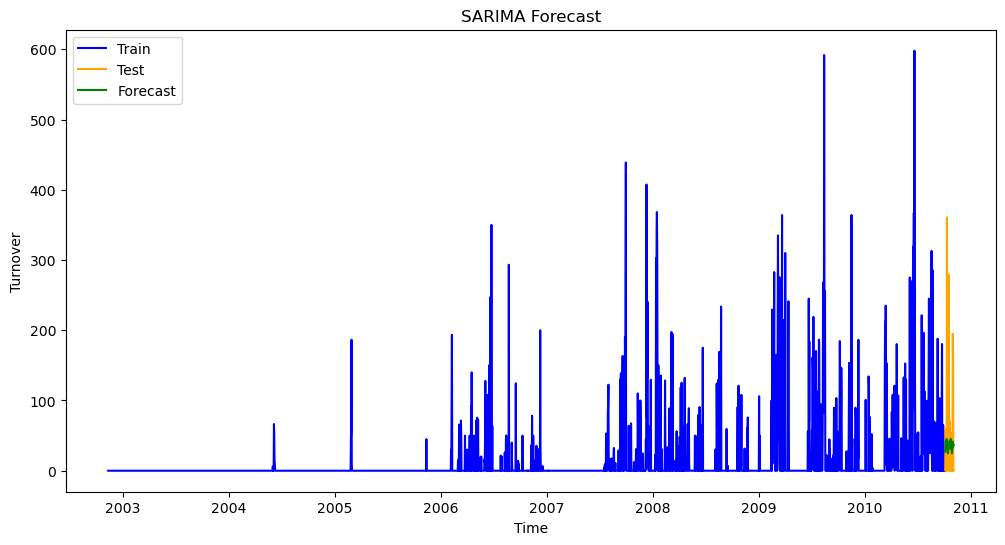

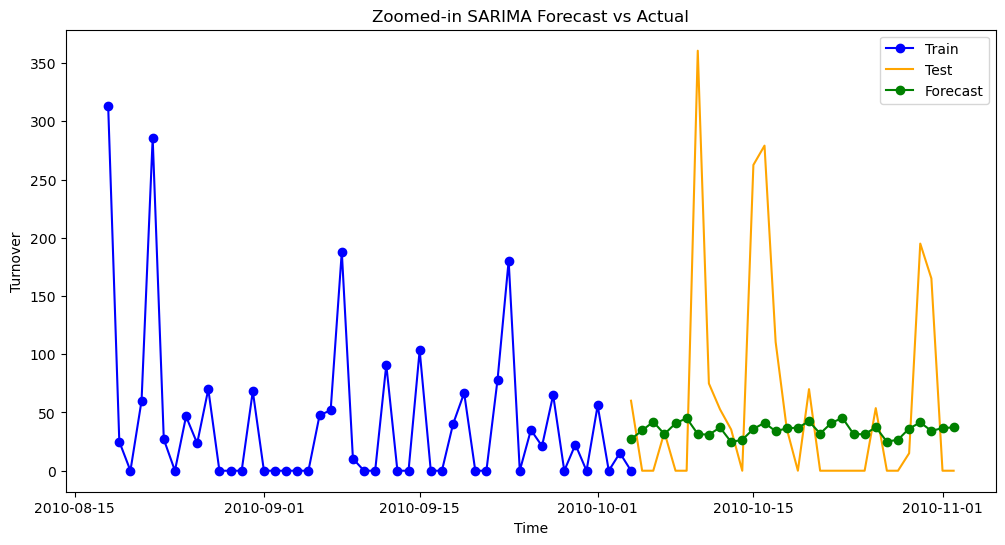

User 535025:
RMSE (Training): 48.588741127402386
RMSE (Testing): 97.84684564059418
Surge started right before: 2010-10-05 00:00:00
Surge started right before: 2010-10-07 00:00:00
Surge started right before: 2010-10-08 00:00:00
Surge started right before: 2010-10-11 00:00:00
Surge started right before: 2010-10-13 00:00:00
Surge started right before: 2010-10-14 00:00:00
Surge started right before: 2010-10-15 00:00:00
Surge started right before: 2010-10-17 00:00:00
Surge started right before: 2010-10-18 00:00:00
Surge started right before: 2010-10-19 00:00:00
Surge started right before: 2010-10-21 00:00:00
Surge started right before: 2010-10-22 00:00:00
Surge started right before: 2010-10-25 00:00:00
Surge started right before: 2010-10-27 00:00:00
Surge started right before: 2010-10-28 00:00:00
Surge started right before: 2010-10-29 00:00:00
Surge started right before: 2010-10-31 00:00:00
Surge started right before: 2010-11-01 00:00:00


C:\Users\abhiv\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


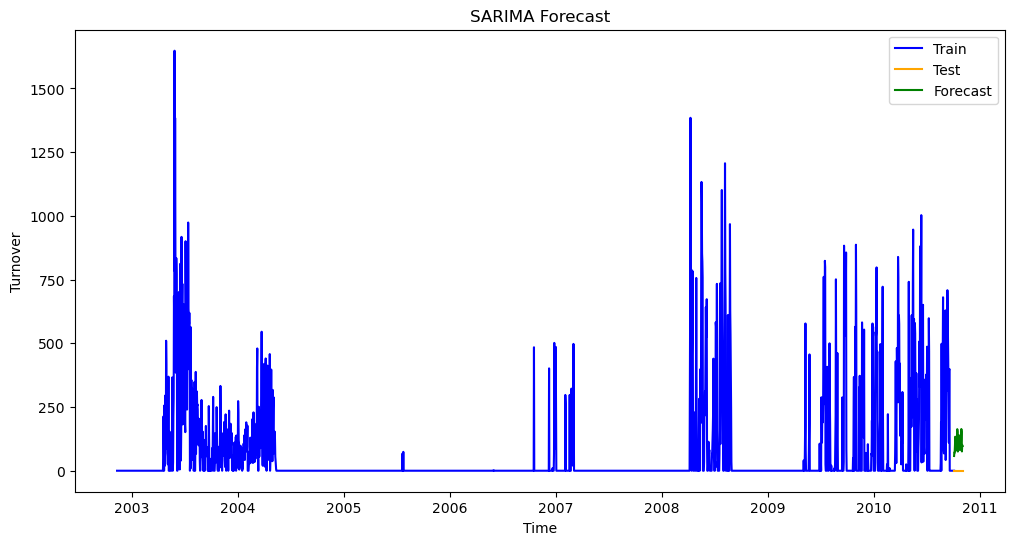

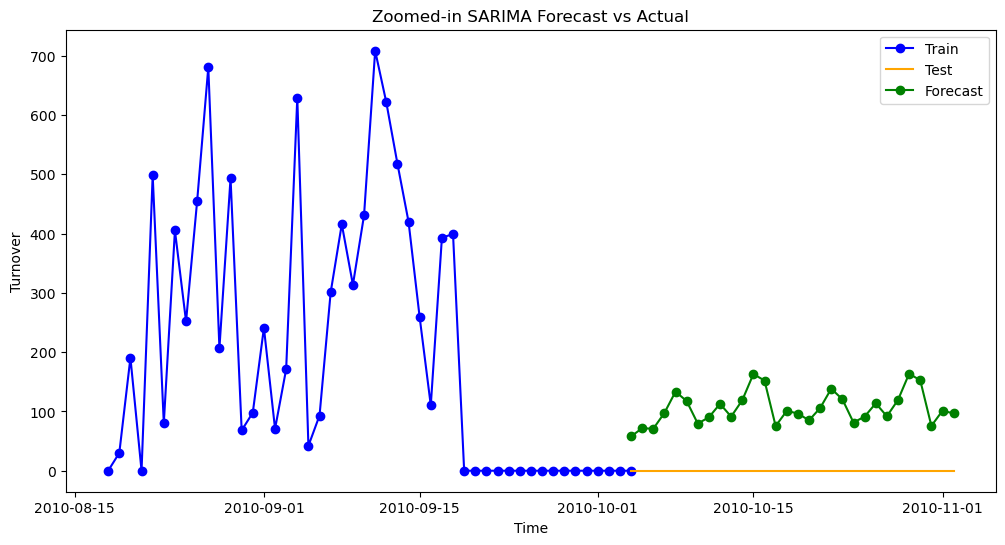

User 676437:
RMSE (Training): 179.64093782762419
RMSE (Testing): 109.10483936986472
Surge started right before: 2010-10-06 00:00:00
Surge started right before: 2010-10-07 00:00:00
Surge started right before: 2010-10-10 00:00:00
Surge started right before: 2010-10-11 00:00:00
Surge started right before: 2010-10-13 00:00:00
Surge started right before: 2010-10-14 00:00:00
Surge started right before: 2010-10-17 00:00:00
Surge started right before: 2010-10-20 00:00:00
Surge started right before: 2010-10-21 00:00:00
Surge started right before: 2010-10-24 00:00:00
Surge started right before: 2010-10-25 00:00:00
Surge started right before: 2010-10-27 00:00:00
Surge started right before: 2010-10-28 00:00:00
Surge started right before: 2010-10-31 00:00:00


C:\Users\abhiv\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


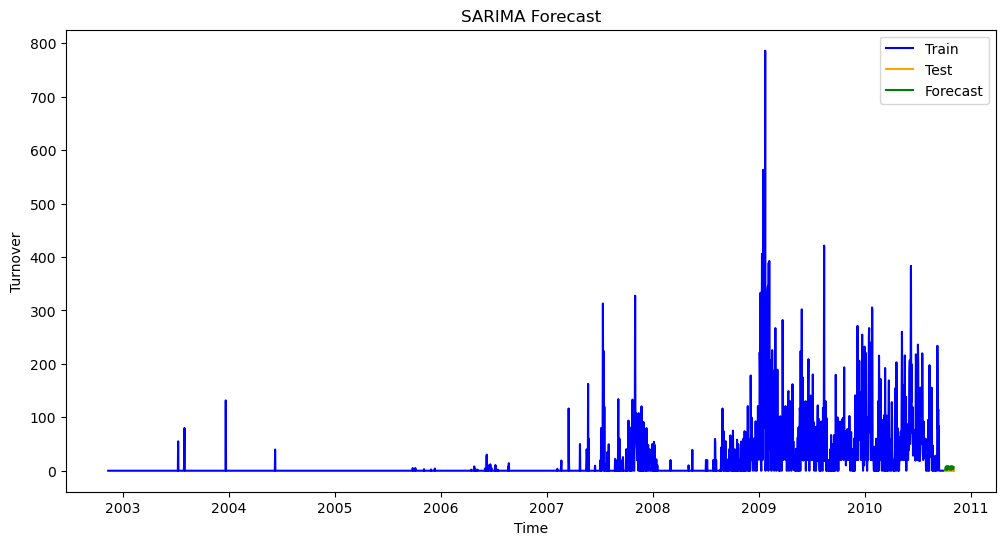

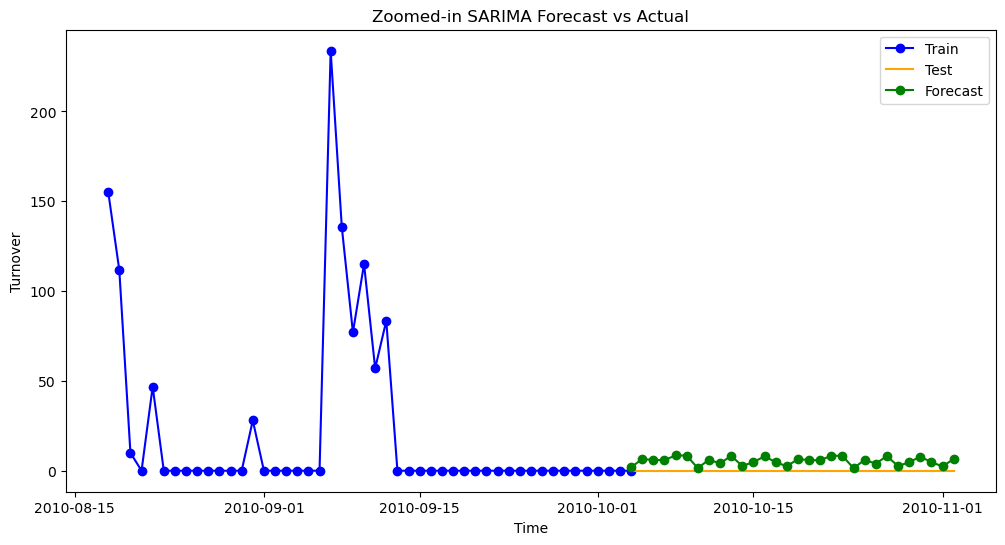

User 708122:
RMSE (Training): 52.739223860026925
RMSE (Testing): 5.88674135986579
Surge started right before: 2010-10-07 00:00:00
Surge started right before: 2010-10-10 00:00:00
Surge started right before: 2010-10-12 00:00:00
Surge started right before: 2010-10-14 00:00:00
Surge started right before: 2010-10-15 00:00:00
Surge started right before: 2010-10-18 00:00:00
Surge started right before: 2010-10-21 00:00:00
Surge started right before: 2010-10-24 00:00:00
Surge started right before: 2010-10-26 00:00:00
Surge started right before: 2010-10-28 00:00:00
Surge started right before: 2010-10-29 00:00:00
Surge started right before: 2010-11-01 00:00:00


C:\Users\abhiv\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


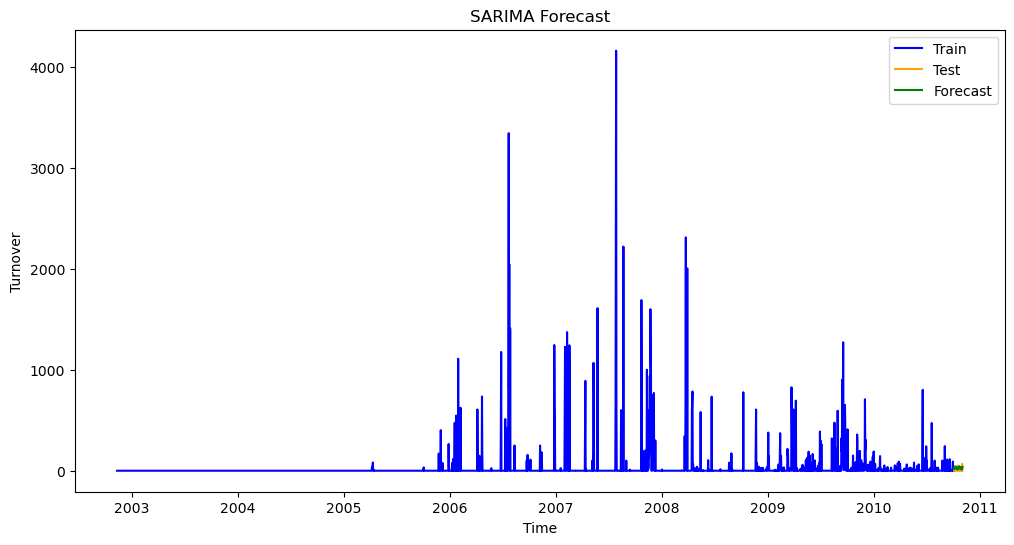

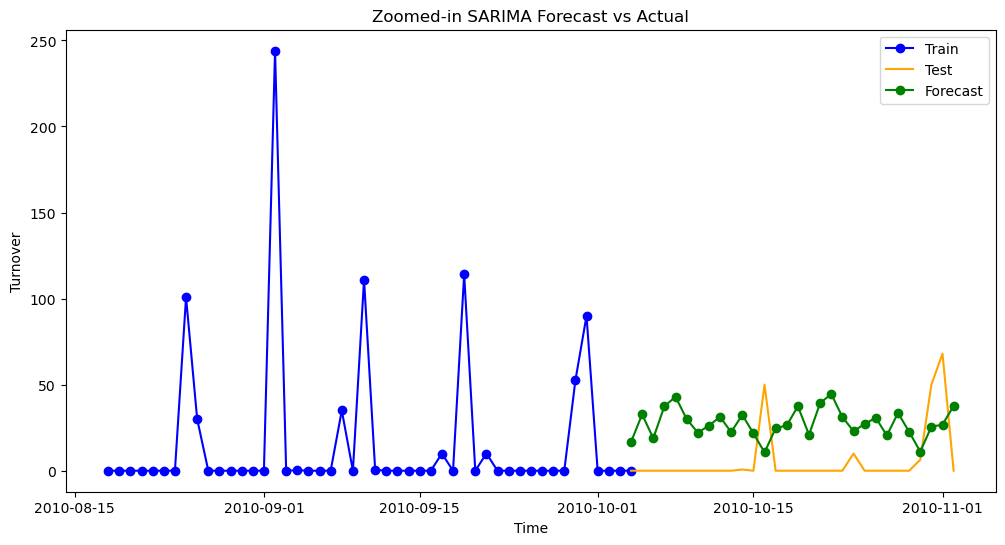

User 717922:
RMSE (Training): 195.3694090163206
RMSE (Testing): 29.91028580788377
Surge started right before: 2010-10-06 00:00:00
Surge started right before: 2010-10-07 00:00:00
Surge started right before: 2010-10-10 00:00:00
Surge started right before: 2010-10-11 00:00:00
Surge started right before: 2010-10-13 00:00:00
Surge started right before: 2010-10-16 00:00:00
Surge started right before: 2010-10-17 00:00:00
Surge started right before: 2010-10-18 00:00:00
Surge started right before: 2010-10-20 00:00:00
Surge started right before: 2010-10-21 00:00:00
Surge started right before: 2010-10-24 00:00:00
Surge started right before: 2010-10-25 00:00:00
Surge started right before: 2010-10-27 00:00:00
Surge started right before: 2010-10-30 00:00:00
Surge started right before: 2010-10-31 00:00:00
Surge started right before: 2010-11-01 00:00:00


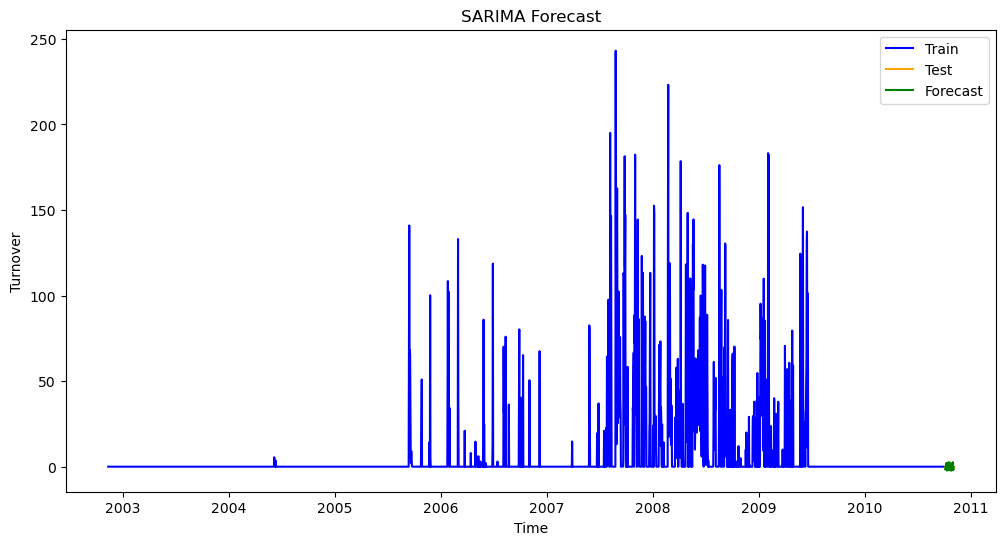

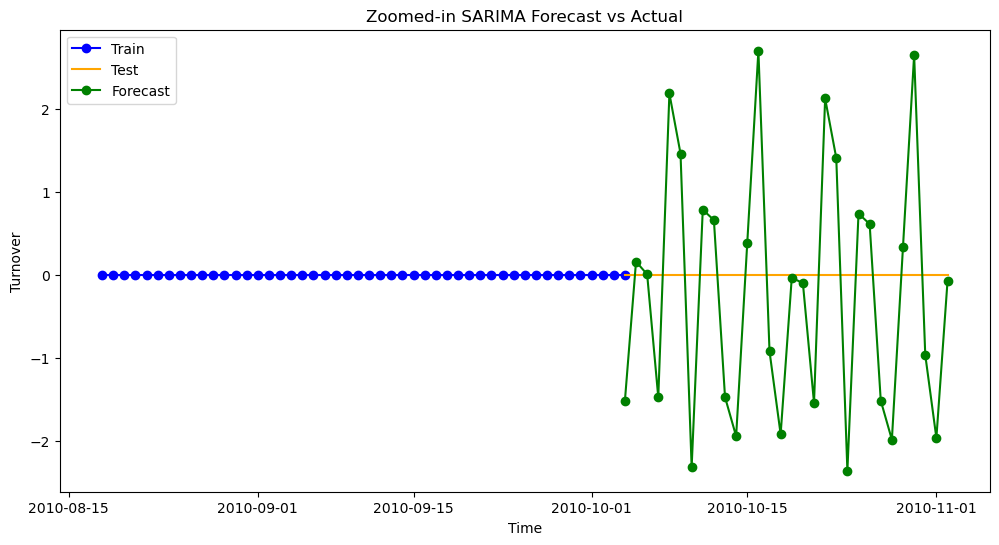

User 731018:
RMSE (Training): 24.500988394047926
RMSE (Testing): 1.5210207875135668
Surge started right before: 2010-10-07 00:00:00
Surge started right before: 2010-10-10 00:00:00
Surge started right before: 2010-10-14 00:00:00
Surge started right before: 2010-10-15 00:00:00
Surge started right before: 2010-10-18 00:00:00
Surge started right before: 2010-10-21 00:00:00
Surge started right before: 2010-10-24 00:00:00
Surge started right before: 2010-10-28 00:00:00
Surge started right before: 2010-10-29 00:00:00
Surge started right before: 2010-11-01 00:00:00


In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error



# Loop through each user in arimausers
for user_id in arimausers['UserID'].head(10):
    x_single_user_turnover = user_data_3d['Turnover'][user_data_3d.index == user_id]
    x_single_user_turnover_ravel = x_single_user_turnover.values.ravel()

    

    frequency = 'D'  # Daily frequency

    start_date='2002-11-12'
    end_date='2010-11-10'



    # Create a time index for your data
    time_index = pd.date_range(start=start_date, periods=len(x_single_user_turnover_ravel), freq=frequency)


    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    x_single_user_turnover_ravel_scaled = scaler.fit_transform(x_single_user_turnover_ravel.reshape(-1, 1))

    # Split the data into training and test sets
    split_ratio = 0.99  # 80% for training, 20% for testing
    split_index = int(len(x_single_user_turnover_ravel) * split_ratio)

    train_data = x_single_user_turnover_ravel_scaled[:split_index]
    test_data = x_single_user_turnover_ravel_scaled[split_index:]


    # Create a time index for your data
    time_index_train = pd.date_range(start=start_date, periods=len(train_data), freq=frequency)


    # Create a time index for your data
    time_index_test = pd.date_range(start=time_index_train[-1], periods=len(test_data), freq=frequency)



    # Define the SARIMA model with seasonal difference and order
    model_sarima_monthly = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 14))

    # Fit the model to the training data
    FITmodel_sarima_monthly = model_sarima_monthly.fit()

    # Forecast the test series
    FITmodel_sarima_monthly_forecast = FITmodel_sarima_monthly.forecast(steps=len(test_data))

    # Inverse scale the forecasted values
    FITmodel_sarima_monthly_forecast = scaler.inverse_transform(FITmodel_sarima_monthly_forecast.reshape(-1, 1)).reshape(-1)

    # Inverse scale the training data
    train_data_inverse = scaler.inverse_transform(train_data.reshape(-1, 1)).reshape(-1)

    # Inverse scale the test data
    test_data_inverse = scaler.inverse_transform(test_data.reshape(-1, 1)).reshape(-1)

    # Plot the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(time_index_train, train_data_inverse, label='Train', color='blue')
    forecast_dates = pd.date_range(start=time_index_train[-1], periods=len(test_data), freq=frequency)  # Adjust as needed
    plt.plot(time_index_test, test_data_inverse, label='Test', color='orange')
    plt.plot(forecast_dates, FITmodel_sarima_monthly_forecast, label='Forecast', color='green')
    plt.xlabel('Time')
    plt.ylabel('Turnover')
    plt.legend()
    plt.title('SARIMA Forecast')
    plt.show()


    plt.figure(figsize=(12, 6))
    plt.plot(time_index_train[-48:], train_data_inverse[-48:], label='Train', color='blue', marker='o')
    plt.plot(time_index_test, test_data_inverse, label='Test', color='orange')
    plt.plot(forecast_dates, FITmodel_sarima_monthly_forecast, label='Forecast', color='green', marker='o')
    plt.xlabel('Time')
    plt.ylabel('Turnover')
    plt.legend()
    plt.title('Zoomed-in SARIMA Forecast vs Actual')
    plt.show()


    # Calculate predictions for training and testing data
    train_predictions = FITmodel_sarima_monthly.predict(start=0, end=split_index - 1)
    test_predictions = FITmodel_sarima_monthly_forecast

    # Trim the predicted values to match the length of the actual values
    test_predictions_inverse_trimmed = test_predictions[:len(test_data_inverse)]

    # Calculate RMSE for training and testing
    rmse_train = mean_squared_error(train_data_inverse, train_predictions, squared=False)
    rmse_test = mean_squared_error(test_data_inverse, test_predictions_inverse_trimmed, squared=False)

    # Display results for each user
    print(f"User {user_id}:")
    print(f"RMSE (Training): {rmse_train}")
    print(f"RMSE (Testing): {rmse_test}")
    print("=" * 30)  # Separating results for different users

    
    # Compute differences between consecutive predicted values
    differences = np.diff(test_predictions.flatten())

    # Set a threshold to identify surges
    threshold_difference = 0.5  # You can adjust this threshold based on your data and requirements

    # Identify surges based on differences and threshold
    surge_indices = np.where(differences > threshold_difference)[0]

    # Print the timestamps of the points right before a surge
    for index in surge_indices:
        if index > 0:
            surge_start_timestamp = time_index_test[index]
            print(f"Surge started right before: {surge_start_timestamp}")

# LSTM for non stationary users

In [61]:
lstmusers=is_stationary_df[is_stationary_df['is_stationary']==0]
lstmusers=lstmusers.reset_index()
lstmusers['UserID']

0    1745784
1    3559230
2    5833825
3    6217359
4    6239380
5    7260144
6    8381254
7    8582643
Name: UserID, dtype: int64

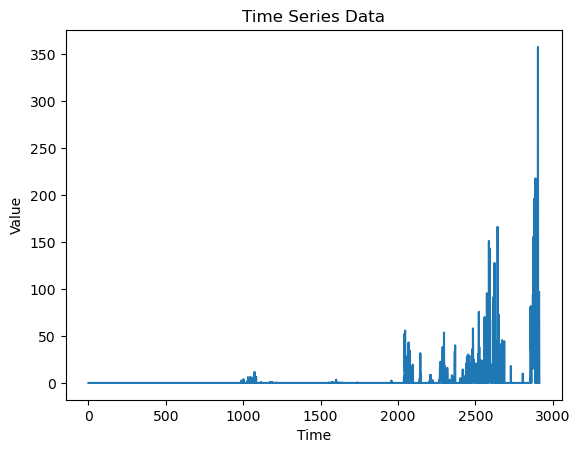

In [62]:
nonstationary_single_user_data=user_data_3d['Turnover'][user_data_3d.index==lstmusers['UserID'][0]]
nonstationary_single_user_data


x_single_user_turnover_ravel=nonstationary_single_user_data.values.ravel()
x_single_user_turnover_ravel


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# Plot the time series to visualize it
plt.plot(x_single_user_turnover_ravel)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()



In [63]:
# #!pip install keras
# #!pip install tensorflow



# nonstationary_single_user_data
# row_variance = nonstationary_single_user_data.var(axis=1, skipna=True).iloc[0]
# row_mean = nonstationary_single_user_data.mean(axis=1).iloc[0]
# row_std = nonstationary_single_user_data.std(axis=1).iloc[0]

# print(f'Mean: {row_mean}')
# print(f'Standard Deviation: {row_std}')
# print(f'Variance: {row_variance}')


# from keras.models import Sequential
# from keras.layers import Dense, LSTM

# nonstationary_single_user_data.describe
# nonstationary_single_user_data_ravel=nonstationary_single_user_data.values.ravel()
# nonstationary_single_user_data_ravel

# training_data__monthly_len= len(nonstationary_single_user_data_ravel) -7
# #print(training_data__monthly_len)

# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(nonstationary_single_user_data_ravel.reshape(-1,1))
# train_data_monthly = scaled_data[0:int(training_data__monthly_len), :]

# x_train = []
# y_train = []

# for i in range(7, len(train_data_monthly)):
#     x_train.append(train_data_monthly[i-7:i, 0])
#     y_train.append(train_data_monthly[i, 0])
#     #if i<= 8:
#         #print(x_train)
#        # print(y_train)
#         #print()

# #print(x_train)
# # Convert the x_train and y_train to numpy arrays 
# x_train, y_train = np.array(x_train), np.array(y_train)

# # Reshape the data
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# # x_train.shape


# from keras.models import Sequential
# from keras.layers import Dense, LSTM
# print(x_train.shape[1])
# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(x_train, y_train, batch_size=1, epochs=1)








# # Create the testing data set
# # Create a new array containing scaled values from index 1543 to 2002 
# test_data = scaled_data[training_data__monthly_len - 7: , :]
# # Create the data sets x_test and y_test
# x_test = []
# dataset = nonstationary_single_user_data_ravel #.values
# y_test = dataset[training_data__monthly_len:]

# for i in range(7, len(test_data)):
#     x_test.append(test_data[i-7:i, 0])
    
# # Convert the data to a numpy array
# x_test = np.array(x_test)

# # Reshape the data
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# # Get the models predicted price values 
# predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)

# # Get the root mean squared error (RMSE)
# rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
# print("Test RMSE",rmse)

# # Plot the data
# train = nonstationary_single_user_data_ravel[:training_data__monthly_len]

# # Create a DataFrame for 'valid' using 'dataset'
# valid = pd.DataFrame({'x': dataset[training_data__monthly_len:]})
# valid['Predictions'] = predictions

# # Create a new x-axis for predictions aligned with the right side of the graph
# x_test_len = len(x_test)
# x_test_idx = range(training_data__monthly_len, training_data__monthly_len + x_test_len)

# # Visualize the data
# plt.figure(figsize=(16, 6))
# plt.title('LSTM Actual vs Predicted Turnover')
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('Turnover', fontsize=18)
# plt.plot(train[0:])

# plt.plot(x_test_idx, valid['x'], linestyle='--', color='orange')  # Use x_test_idx for x-axis
# plt.plot(x_test_idx, valid['Predictions'], linestyle='--', color='green')  # Use x_test_idx for x-axis
# plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
# plt.show()



# # Plot only the last 30 values
# last_30_values = -30

# # Plot training data
# plt.plot(range(training_data__monthly_len - 30, training_data__monthly_len), train[last_30_values:], linestyle='-', color='blue')

# # Plot validation data
# plt.plot(x_test_idx[-30:], valid['x'][-30:], linestyle='--', color='orange')  # Use x_test_idx for x-axis
# plt.plot(x_test_idx[-30:], valid['Predictions'][-30:], linestyle='--', color='green')  # Use x_test_idx for x-axis

# plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
# plt.show()




In [64]:
#train[0:]

In [65]:
# # Import necessary libraries
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import Dense, LSTM
# from keras.optimizers import Adam

# # Assuming you have loaded your data into the variable nonstationary_single_user_data

# # Extract statistics from the data
# row_variance = nonstationary_single_user_data.var(axis=1, skipna=True).iloc[0]
# row_mean = nonstationary_single_user_data.mean(axis=1).iloc[0]
# row_std = nonstationary_single_user_data.std(axis=1).iloc[0]

# print(f'Mean: {row_mean}')
# print(f'Standard Deviation: {row_std}')
# print(f'Variance: {row_variance}')

# # Flatten the data
# nonstationary_single_user_data_ravel = nonstationary_single_user_data.values.ravel()

# test_weeks=3

# # Set the length of training data 
# training_data_monthly_len = len(nonstationary_single_user_data_ravel) - 7*test_weeks

# # Scale the data
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(nonstationary_single_user_data_ravel.reshape(-1, 1))
# train_data_monthly = scaled_data[0:int(training_data_monthly_len), :]

# # Prepare the training data
# x_train = []
# y_train = []

# for i in range(7*test_weeks, len(train_data_monthly)):
#     x_train.append(train_data_monthly[i-7*test_weeks:i, 0])
#     y_train.append(train_data_monthly[i, 0])

# x_train, y_train = np.array(x_train), np.array(y_train)

# # Reshape the data
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(LSTM(units=64, return_sequences=False))
# model.add(Dense(units=25))
# model.add(Dense(units=1))

# # Compile the model
# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='mean_squared_error')

# # Train the model
# model.fit(x_train, y_train, batch_size=1, epochs=3)  # Adjust epochs as needed

# # Prepare the testing data
# test_data = scaled_data[training_data_monthly_len - 7*test_weeks:, :]
# x_test = []

# for i in range(7*test_weeks, len(test_data)):
#     x_test.append(test_data[i-(7*test_weeks):i, 0])

# x_test = np.array(x_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# # Get predictions
# predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)

# # Get the root mean squared error (RMSE)
# rmse = np.sqrt(np.mean(((predictions - nonstationary_single_user_data_ravel[training_data_monthly_len:]) ** 2)))
# print("Test RMSE:", rmse)

# # # Visualize the data
# # train = nonstationary_single_user_data_ravel[:training_data_monthly_len]
# # valid = pd.DataFrame({'x': nonstationary_single_user_data_ravel[training_data_monthly_len:]})
# # valid['Predictions'] = predictions

# # x_test_idx = range(training_data_monthly_len, training_data_monthly_len + len(x_test))

# # plt.figure(figsize=(16, 6))
# # plt.title('LSTM Actual vs Predicted Turnover')
# # plt.xlabel('Date', fontsize=18)
# # plt.ylabel('Turnover', fontsize=18)
# # plt.plot(train[:])
# # plt.plot(x_test_idx, valid['x'], linestyle='--', color='orange')
# # plt.plot(x_test_idx, valid['Predictions'], linestyle='--', color='green')
# # plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
# # plt.show()

# # # Plot only the last 30 values
# # last_30_values = -30

# # # Plot training data
# # plt.plot(range(training_data__monthly_len - 30, training_data__monthly_len), train[last_30_values:], linestyle='-', color='blue')

# # # Plot validation data
# # plt.plot(x_test_idx[-30:], valid['x'][-30:], linestyle='--', color='orange')  # Use x_test_idx for x-axis
# # plt.plot(x_test_idx[-30:], valid['Predictions'][-30:], linestyle='--', color='green')  # Use x_test_idx for x-axis

# # plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
# # plt.show()




In [66]:
# # Generate time indices
# start_date = '2002-11-12'
# end_date = '2010-11-10'
# test_window_lastweek='2010-11-03'
# time_index_train = pd.date_range(start=start_date,  periods=training_data_monthly_len+(7*test_weeks),freq=frequency)
# time_index_test = pd.date_range(start=test_window_lastweek, periods=len(x_test),freq=frequency)

# # Visualize the data
# train = nonstationary_single_user_data_ravel[:training_data_monthly_len+(7*test_weeks)]
# valid = pd.DataFrame({'x': nonstationary_single_user_data_ravel[training_data_monthly_len:]})
# valid['Predictions'] = predictions

# plt.figure(figsize=(16, 6))
# plt.title('LSTM Actual vs Predicted Turnover')
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('Turnover', fontsize=18)
# plt.plot(time_index_train, train[:])
# plt.plot(time_index_test, valid['x'], linestyle='--', color='orange')
# plt.plot(time_index_test, valid['Predictions'], linestyle='--', color='green')
# plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
# plt.show()



# # Plot only the last 30 values
# last_30_values = -30

# # Plot training data
# plt.plot(time_index_train[-30:], train[last_30_values:], linestyle='-', color='blue')

# # Plot validation data
# plt.plot(time_index_test, valid['x'], linestyle='--', color='orange')  # Use x_test_idx for x-axis
# plt.plot(time_index_test, valid['Predictions'], linestyle='--', color='green')  # Use x_test_idx for x-axis

# plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')

# # Rotate x-axis labels
# plt.xticks(rotation=45, ha='right')

# plt.show()



In [67]:
#len(x_test)

# GRID SEARCH FOR BEST PARAMS

In [68]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import Dense, LSTM
# from keras.optimizers import Adam
# from sklearn.metrics import mean_squared_error

# # Function to create and train an LSTM model
# def create_lstm_model(units, learning_rate):
#     model = Sequential()
#     model.add(LSTM(units=units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
#     model.add(LSTM(units=units, return_sequences=False))
#     model.add(Dense(units=25))
#     model.add(Dense(units=1))

#     optimizer = Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='mean_squared_error')
    
#     return model

# # Extract statistics from the data
# row_variance = nonstationary_single_user_data.var(axis=1, skipna=True).iloc[0]
# row_mean = nonstationary_single_user_data.mean(axis=1).iloc[0]
# row_std = nonstationary_single_user_data.std(axis=1).iloc[0]

# print(f'Mean: {row_mean}')
# print(f'Standard Deviation: {row_std}')
# print(f'Variance: {row_variance}')

# # Flatten the data
# nonstationary_single_user_data_ravel = nonstationary_single_user_data.values.ravel()

# test_weeks = 3

# # Set the length of training data 
# training_data_monthly_len = len(nonstationary_single_user_data_ravel) - 7 * test_weeks

# # Scale the data
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(nonstationary_single_user_data_ravel.reshape(-1, 1))
# train_data_monthly = scaled_data[0:int(training_data_monthly_len), :]

# # Prepare the training data
# x_train = []
# y_train = []

# for i in range(7 * test_weeks, len(train_data_monthly)):
#     x_train.append(train_data_monthly[i - 7 * test_weeks:i, 0])
#     y_train.append(train_data_monthly[i, 0])

# x_train, y_train = np.array(x_train), np.array(y_train)

# # Reshape the data
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# # Define hyperparameters for tuning
# units_values = [64, 128, 256]
# learning_rate_values = [0.01, 0.001, 0.0001]

# best_rmse = float('inf')
# best_params = None

# # Perform grid search
# for units in units_values:
#     for learning_rate in learning_rate_values:
#         model = create_lstm_model(units, learning_rate)
        
#         # Train the model
#         model.fit(x_train, y_train, batch_size=1, epochs=3, verbose=0)

#         # Prepare the testing data
#         test_data = scaled_data[training_data_monthly_len - 7 * test_weeks:, :]
#         x_test = []

#         for i in range(7 * test_weeks, len(test_data)):
#             x_test.append(test_data[i - (7 * test_weeks):i, 0])

#         x_test = np.array(x_test)
#         x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#         # Get predictions
#         predictions = model.predict(x_test)
#         predictions = scaler.inverse_transform(predictions)

#         # Get the root mean squared error (RMSE)
#         rmse = np.sqrt(mean_squared_error(predictions, nonstationary_single_user_data_ravel[training_data_monthly_len:]))
        
#         print(f"Units: {units}, Learning Rate: {learning_rate}, Test RMSE: {rmse}")

#         # Update the best parameters if RMSE is improved
#         if rmse < best_rmse:
#             best_rmse = rmse
#             best_params = {'units': units, 'learning_rate': learning_rate}

# # Print the best hyperparameters
# print(f"Best Hyperparameters: {best_params}, Best RMSE: {best_rmse}")


In [69]:
# Mean: 35.68018188057653
# Standard Deviation: 122.09556811748713
# Variance: 14907.32775393194
# 1/1 [==============================] - 1s 853ms/step
# Units: 64, Learning Rate: 0.01, Test RMSE: 375.2553253207926
# 1/1 [==============================] - 1s 840ms/step
# Units: 64, Learning Rate: 0.001, Test RMSE: 231.66883181925292
# 1/1 [==============================] - 1s 907ms/step
# Units: 64, Learning Rate: 0.0001, Test RMSE: 299.90232400037746
# 1/1 [==============================] - 1s 902ms/step
# Units: 128, Learning Rate: 0.01, Test RMSE: 398.97323688410444
# 1/1 [==============================] - 1s 879ms/step
# Units: 128, Learning Rate: 0.001, Test RMSE: 241.82620950011136
# 1/1 [==============================] - 1s 854ms/step
# Units: 128, Learning Rate: 0.0001, Test RMSE: 279.9525872191042
# 1/1 [==============================] - 1s 886ms/step
# Units: 256, Learning Rate: 0.01, Test RMSE: 398.22153453188594
# 1/1 [==============================] - 1s 876ms/step
# Units: 256, Learning Rate: 0.001, Test RMSE: 289.69737162552474
# 1/1 [==============================] - 1s 879ms/step
# Units: 256, Learning Rate: 0.0001, Test RMSE: 266.59826253364014
# Best Hyperparameters: {'units': 64, 'learning_rate': 0.001}, Best RMSE: 231.66883181925292

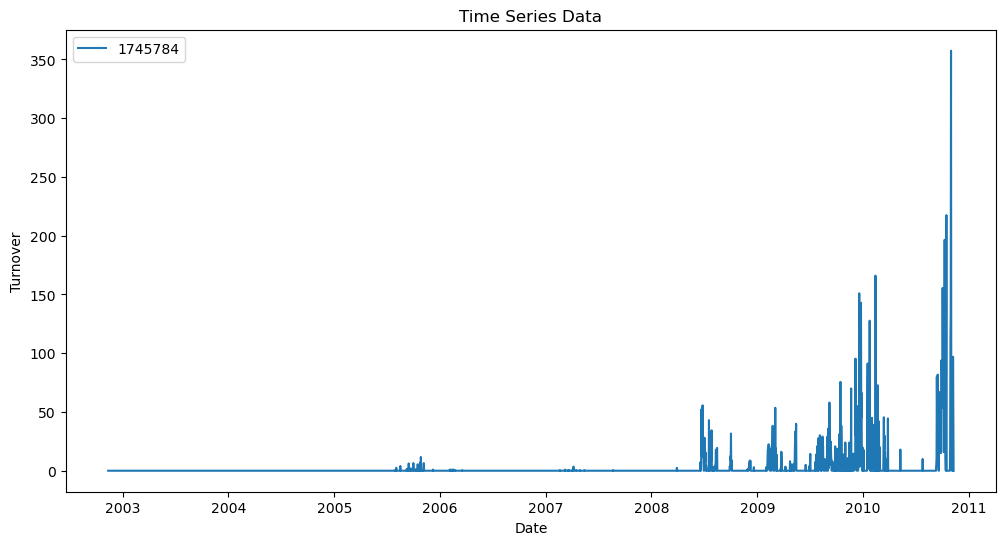

Mean: 2.702481125600549
Standard Deviation: 14.545025368841689
Variance: 211.5577629802483
Epoch 1/5
2886/2886 [==============================] - 23s 7ms/step - loss: 0.0011
Epoch 2/5
2886/2886 [==============================] - 19s 7ms/step - loss: 9.8156e-04
Epoch 3/5
2886/2886 [==============================] - 19s 7ms/step - loss: 9.6631e-04
Epoch 4/5
2886/2886 [==============================] - 19s 7ms/step - loss: 9.0001e-04
Epoch 5/5
1/1 [==============================] - 1s 1s/step
Test RMSE: 102.46282871556674


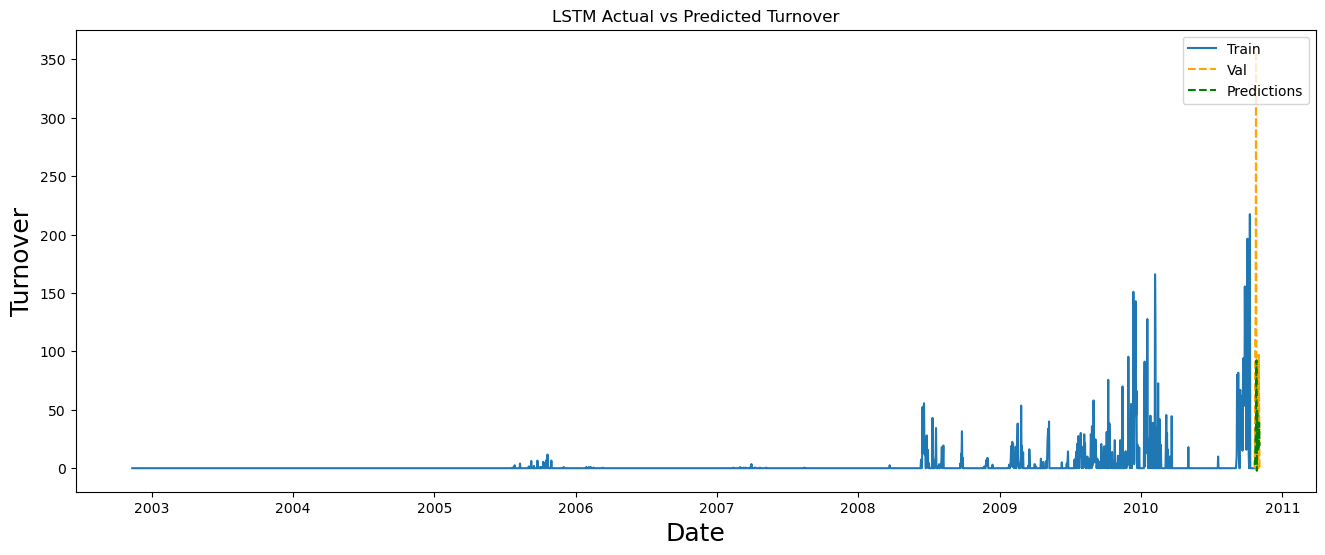

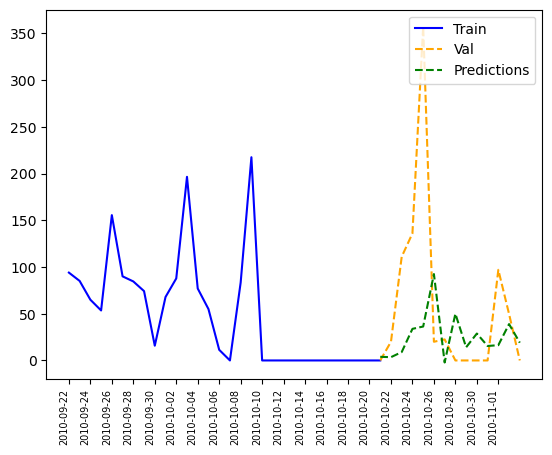

Surge started right before: 2010-10-22 00:00:00
Surge started right before: 2010-10-23 00:00:00
Surge started right before: 2010-10-24 00:00:00
Surge started right before: 2010-10-25 00:00:00
Surge started right before: 2010-10-27 00:00:00
Surge started right before: 2010-10-29 00:00:00
Surge started right before: 2010-10-31 00:00:00
Surge started right before: 2010-11-01 00:00:00


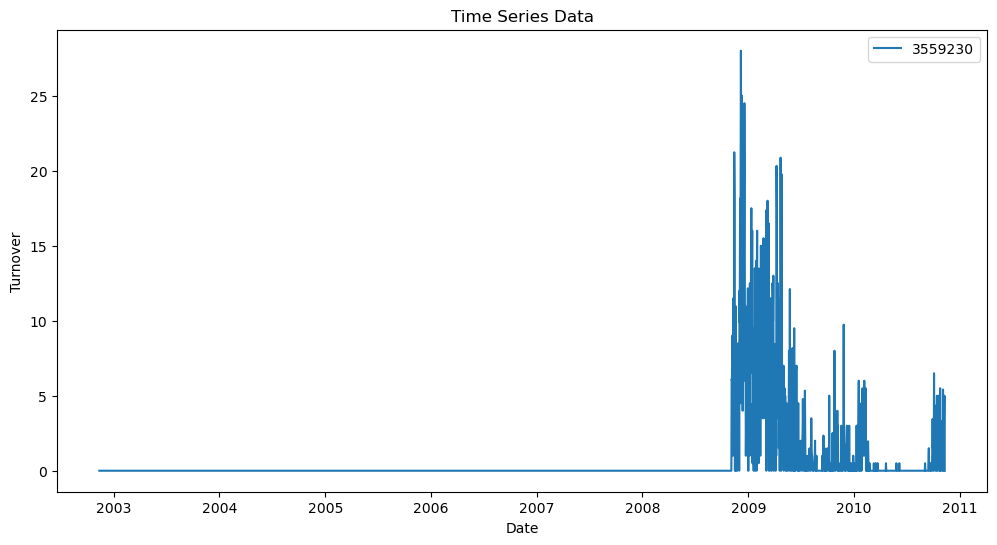

Mean: 0.6332394989704874
Standard Deviation: 2.4845768919716433
Variance: 6.173122332119472
Epoch 1/5
2886/2886 [==============================] - 23s 6ms/step - loss: 0.0046
Epoch 2/5
2886/2886 [==============================] - 19s 6ms/step - loss: 0.0042
Epoch 3/5
2886/2886 [==============================] - 19s 6ms/step - loss: 0.0039
Epoch 4/5
2886/2886 [==============================] - 19s 6ms/step - loss: 0.0040
Epoch 5/5
1/1 [==============================] - 1s 981ms/step
Test RMSE: 2.1103246614308615


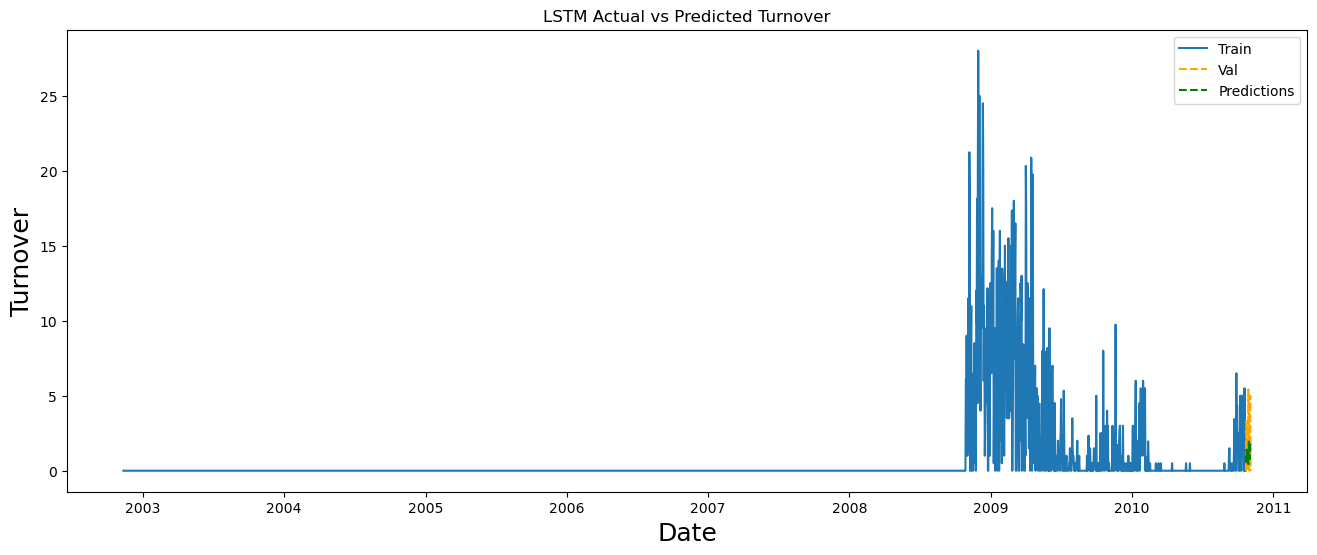

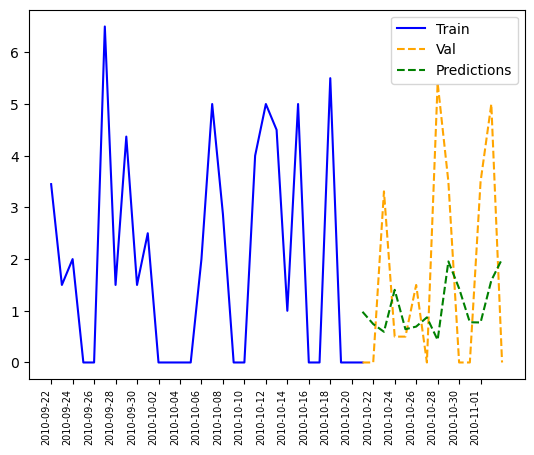

Surge started right before: 2010-10-23 00:00:00
Surge started right before: 2010-10-28 00:00:00
Surge started right before: 2010-11-01 00:00:00


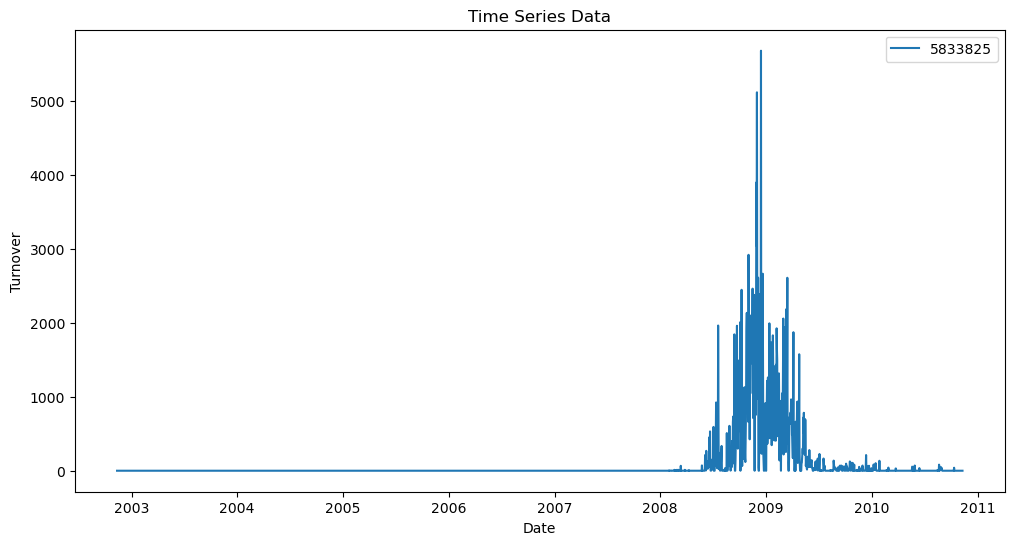

Mean: 84.52668136582017
Standard Deviation: 346.0494606805526
Variance: 119750.22923730132
Epoch 1/5
2886/2886 [==============================] - 26s 7ms/step - loss: 0.0023
Epoch 2/5
2886/2886 [==============================] - 21s 7ms/step - loss: 0.0019
Epoch 3/5
2886/2886 [==============================] - 19s 7ms/step - loss: 0.0019
Epoch 4/5
2886/2886 [==============================] - 20s 7ms/step - loss: 0.0017
Epoch 5/5
1/1 [==============================] - 1s 1s/step
Test RMSE: 42.039514541340594


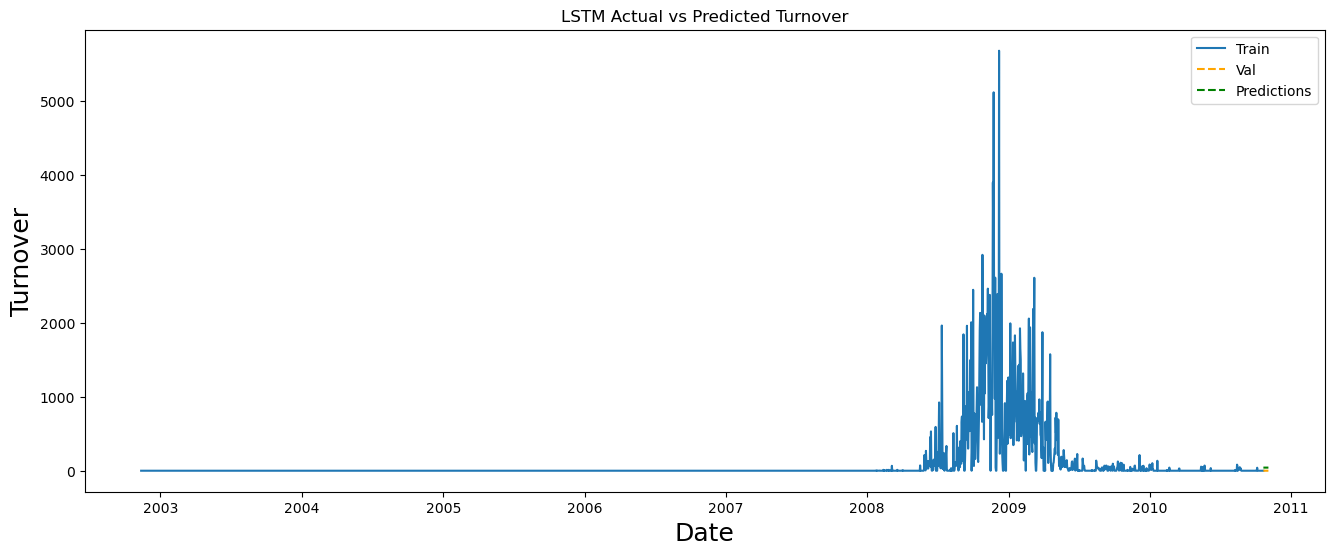

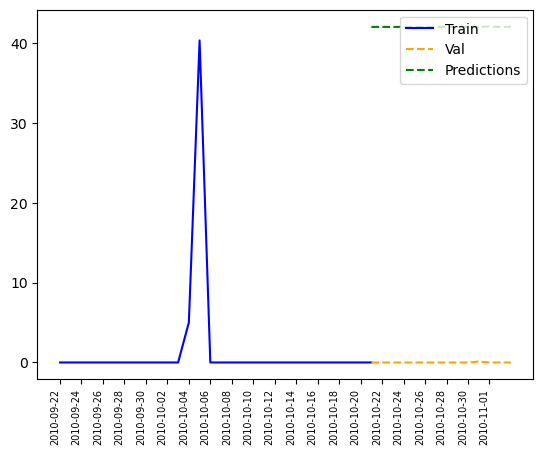

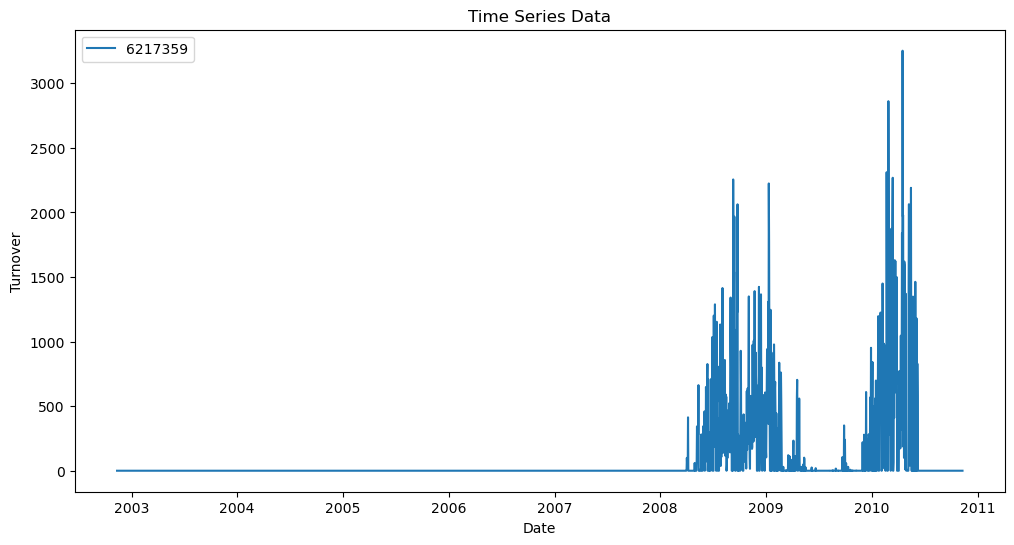

Mean: 76.10440631434454
Standard Deviation: 273.3873816791265
Variance: 74740.6604613684
Epoch 1/5
2886/2886 [==============================] - 23s 6ms/step - loss: 0.0050
Epoch 2/5
2886/2886 [==============================] - 19s 7ms/step - loss: 0.0046
Epoch 3/5
2886/2886 [==============================] - 20s 7ms/step - loss: 0.0045
Epoch 4/5
2886/2886 [==============================] - 20s 7ms/step - loss: 0.0044
Epoch 5/5
1/1 [==============================] - 1s 979ms/step
Test RMSE: 34.24505506243964


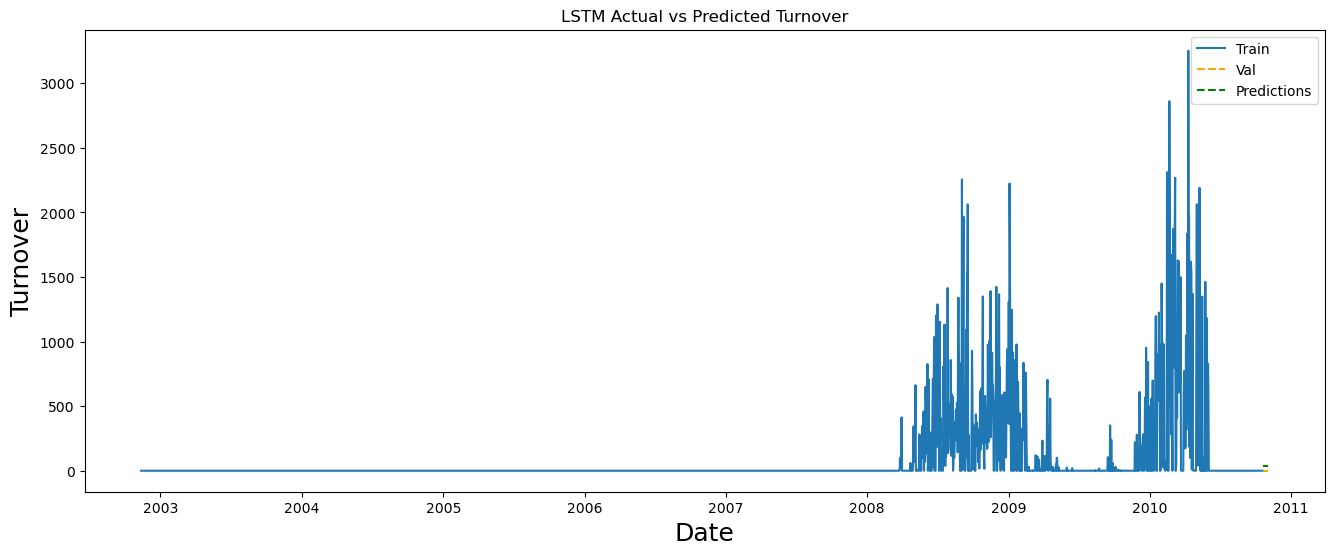

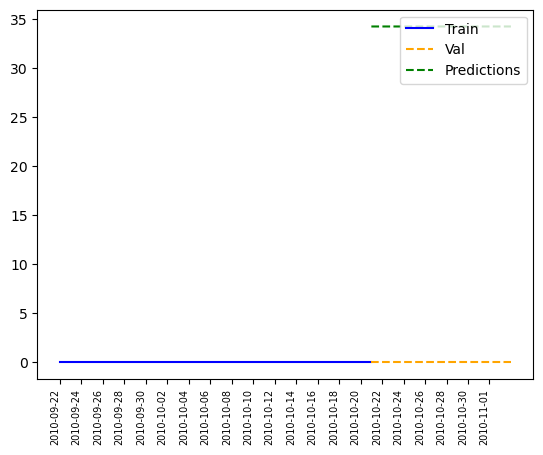

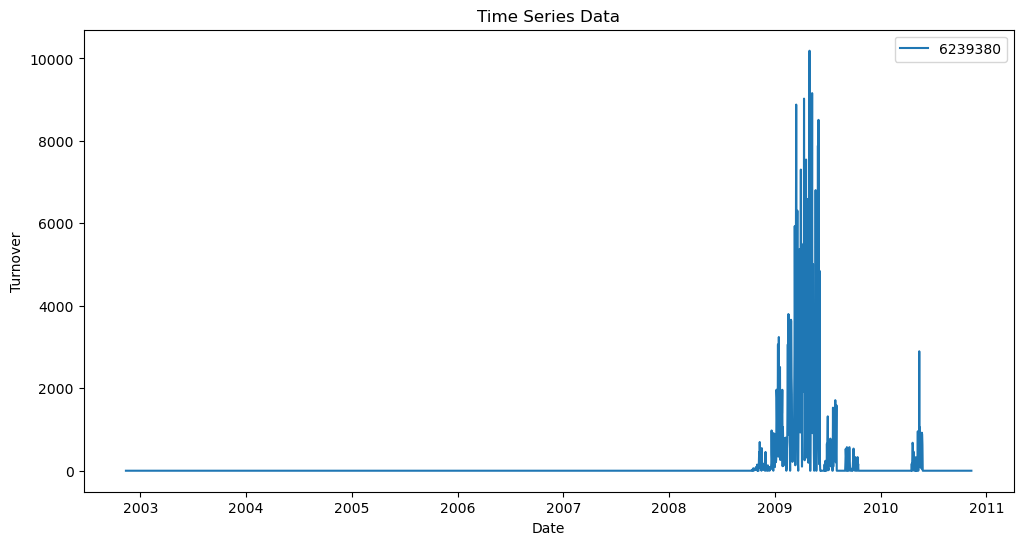

Mean: 147.61094715168153
Standard Deviation: 780.2908435877481
Variance: 608853.8005868795
Epoch 1/5
2886/2886 [==============================] - 24s 7ms/step - loss: 0.0049
Epoch 2/5
2886/2886 [==============================] - 19s 7ms/step - loss: 0.0035
Epoch 3/5
2886/2886 [==============================] - 19s 7ms/step - loss: 0.0033
Epoch 4/5
2886/2886 [==============================] - 19s 7ms/step - loss: 0.0030
Epoch 5/5
1/1 [==============================] - 1s 970ms/step
Test RMSE: 83.5261557443484


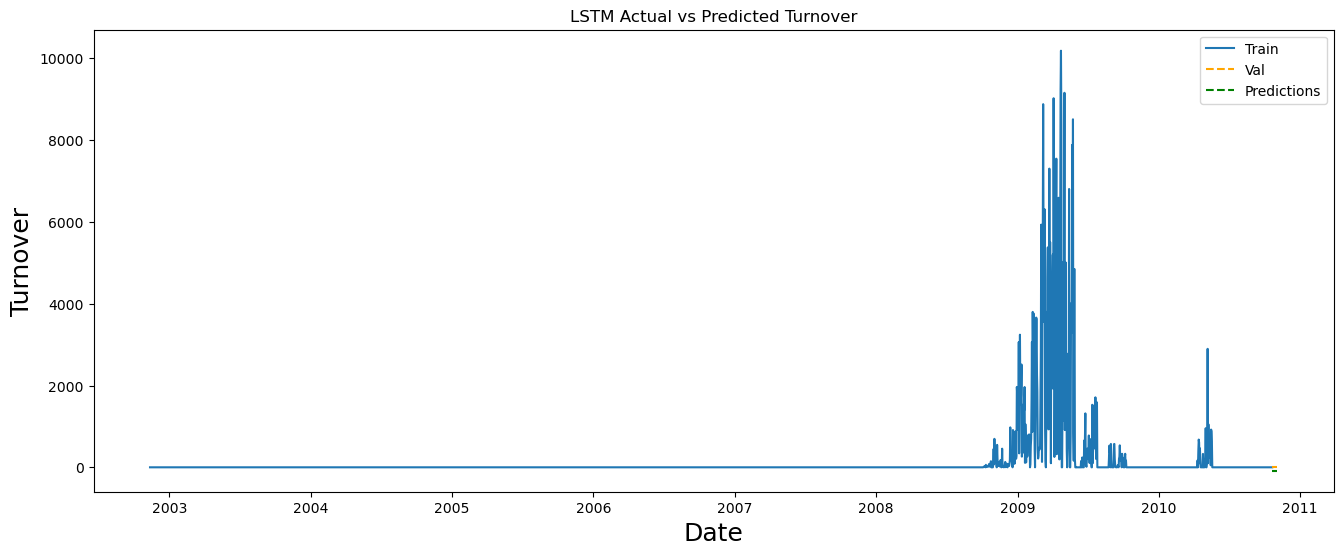

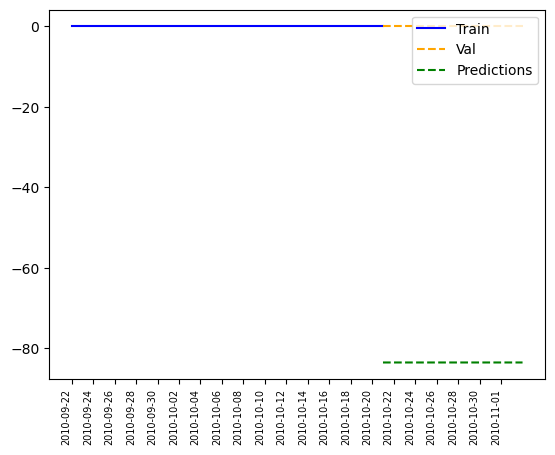

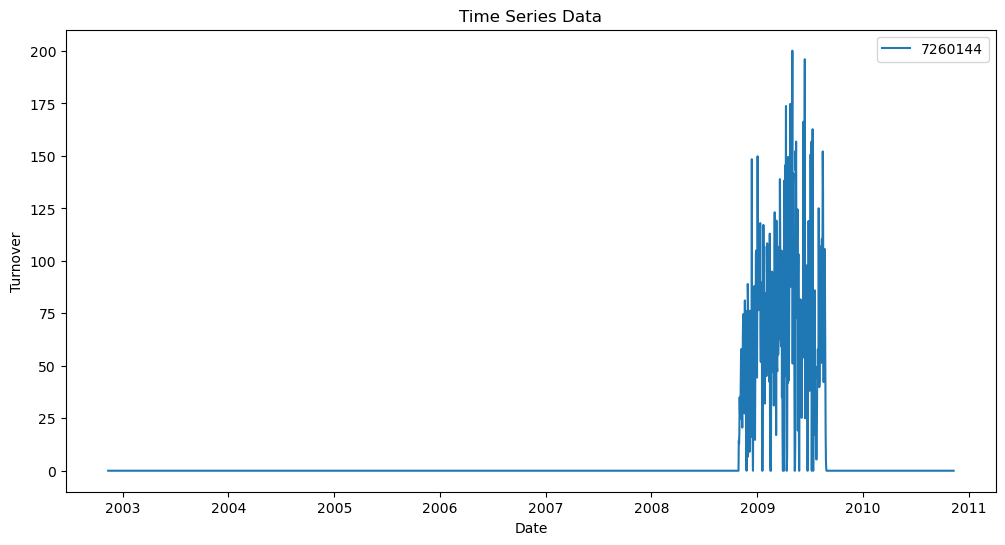

Mean: 6.877652711050102
Standard Deviation: 24.21853589138819
Variance: 586.5374807224579
Epoch 1/5
2886/2886 [==============================] - 25s 7ms/step - loss: 0.0061
Epoch 2/5
2886/2886 [==============================] - 21s 7ms/step - loss: 0.0047
Epoch 3/5
2886/2886 [==============================] - 19s 7ms/step - loss: 0.0044
Epoch 4/5
2886/2886 [==============================] - 19s 7ms/step - loss: 0.0044
Epoch 5/5
1/1 [==============================] - 1s 1s/step
Test RMSE: 0.1572084661257174


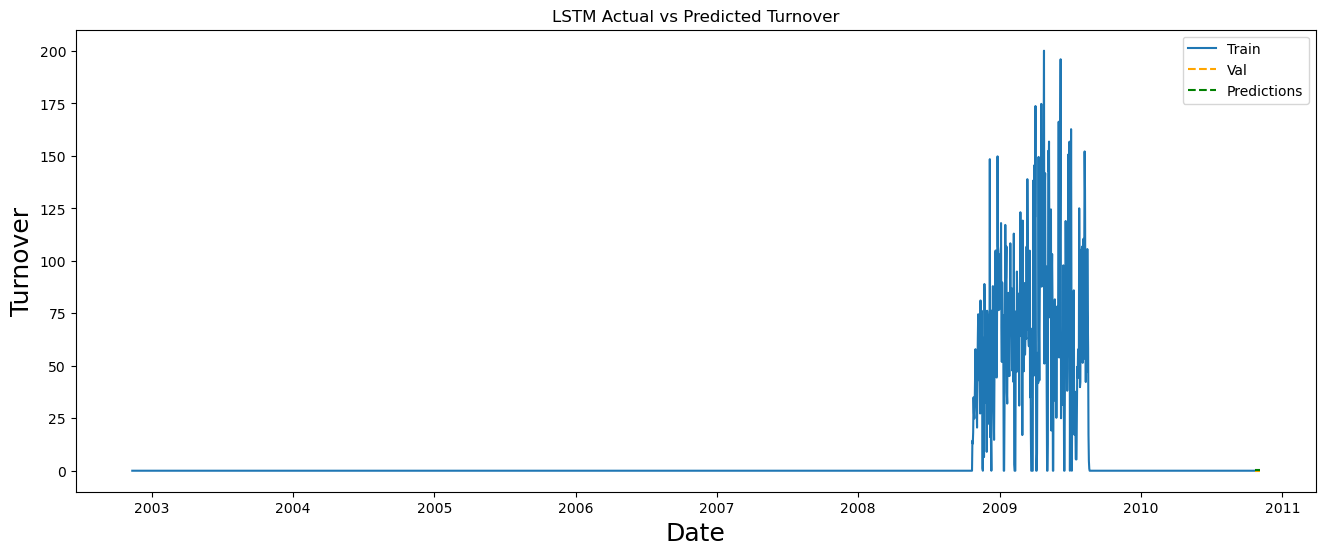

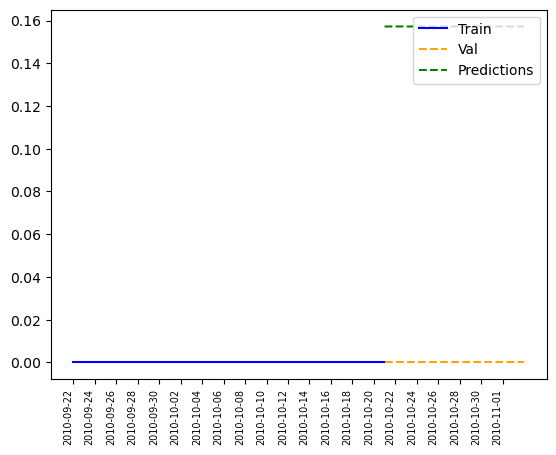

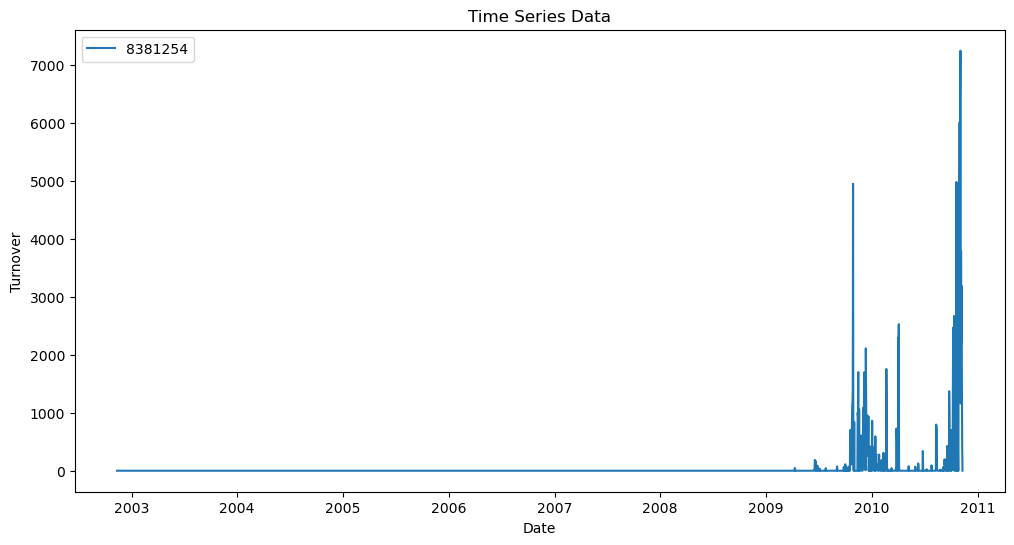

Mean: 46.10133555050872
Standard Deviation: 358.79896022701485
Variance: 128736.69385998696
Epoch 1/5
2886/2886 [==============================] - 23s 7ms/step - loss: 9.3631e-04
Epoch 2/5
2886/2886 [==============================] - 19s 7ms/step - loss: 8.8584e-04
Epoch 3/5
2886/2886 [==============================] - 19s 7ms/step - loss: 7.6109e-04
Epoch 4/5
2886/2886 [==============================] - 18s 6ms/step - loss: 7.7931e-04
Epoch 5/5
1/1 [==============================] - 1s 1s/step
Test RMSE: 3135.2826497834803


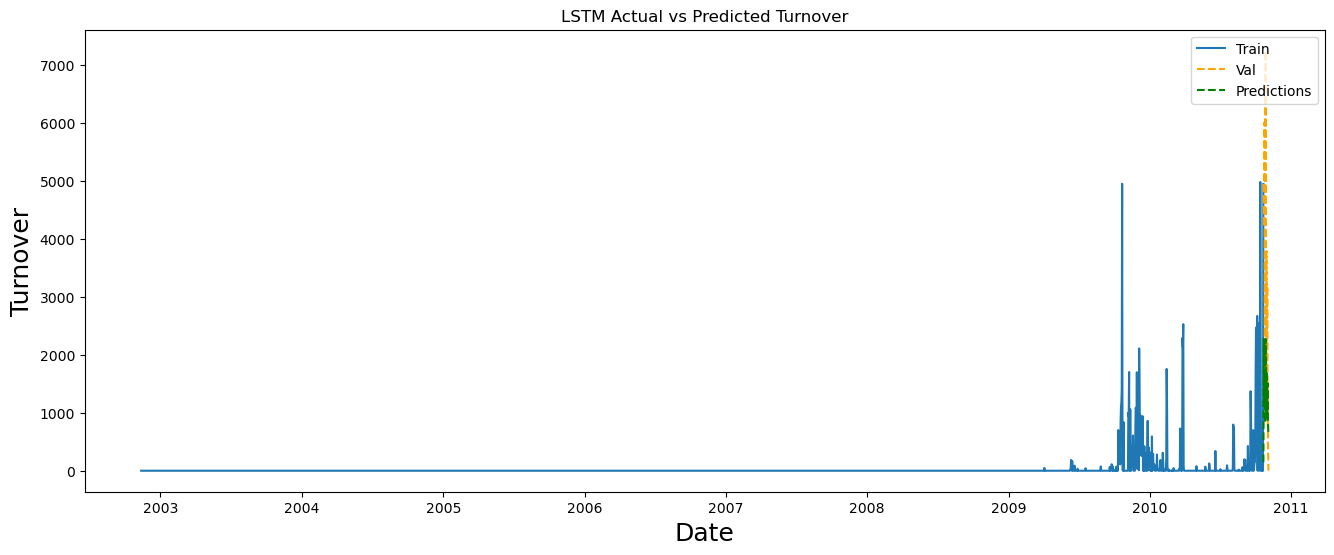

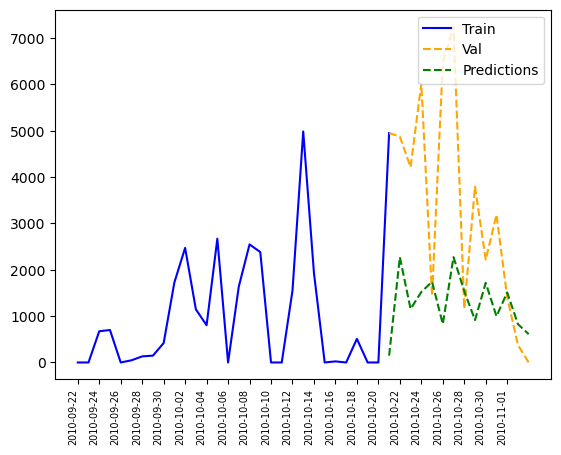

Surge started right before: 2010-10-23 00:00:00
Surge started right before: 2010-10-24 00:00:00
Surge started right before: 2010-10-26 00:00:00
Surge started right before: 2010-10-29 00:00:00
Surge started right before: 2010-10-31 00:00:00


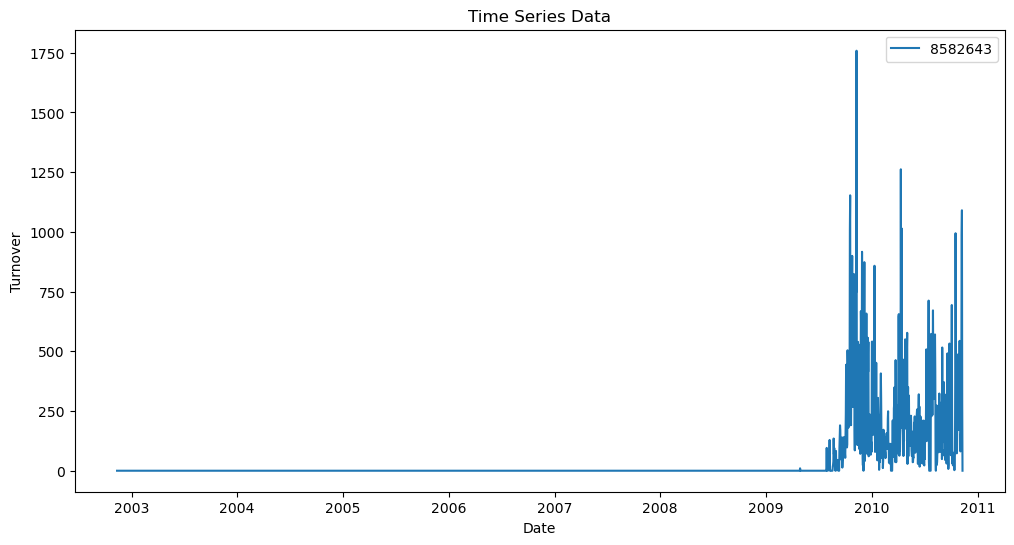

Mean: 35.68018188057653
Standard Deviation: 122.09556811748713
Variance: 14907.32775393194
Epoch 1/5
2886/2886 [==============================] - 24s 6ms/step - loss: 0.0025
Epoch 2/5
2886/2886 [==============================] - 19s 6ms/step - loss: 0.0021
Epoch 3/5
2886/2886 [==============================] - 19s 7ms/step - loss: 0.0020
Epoch 4/5
2886/2886 [==============================] - 18s 6ms/step - loss: 0.0020
Epoch 5/5
1/1 [==============================] - 1s 931ms/step
Test RMSE: 323.7467101132895


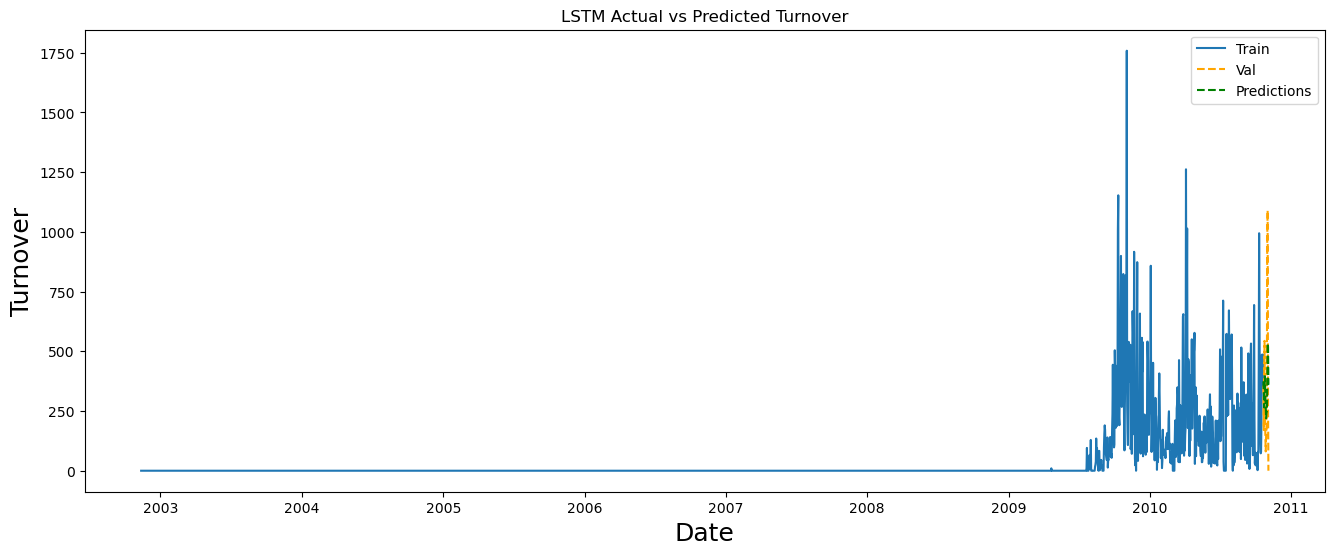

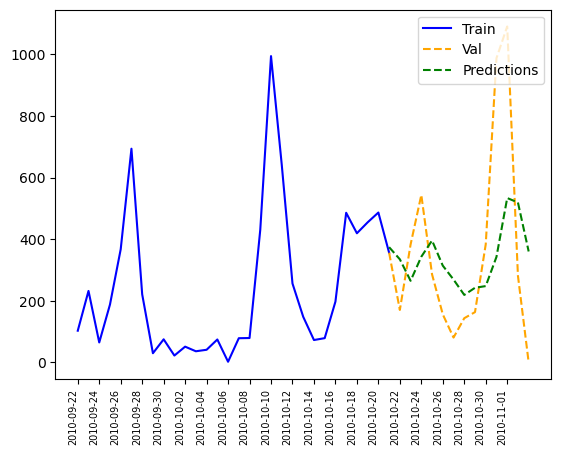

Surge started right before: 2010-10-23 00:00:00
Surge started right before: 2010-10-24 00:00:00
Surge started right before: 2010-10-28 00:00:00
Surge started right before: 2010-10-29 00:00:00
Surge started right before: 2010-10-30 00:00:00
Surge started right before: 2010-10-31 00:00:00


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



for lstmuser in lstmusers['UserID']:
    


    nonstationary_single_user_data=user_data_3d['Turnover'][user_data_3d.index==lstmuser]
    nonstationary_single_user_data






    x_single_user_turnover_ravel=nonstationary_single_user_data.values.ravel()
    x_single_user_turnover_ravel




    nonstationary_single_user_data_transposed = nonstationary_single_user_data.T

    # Plot the time series with dates as columns
    plt.figure(figsize=(12, 6))
    for column in nonstationary_single_user_data_transposed.columns:
        plt.plot(nonstationary_single_user_data_transposed.index, nonstationary_single_user_data_transposed[column], label=column)

    plt.xlabel('Date')
    plt.ylabel('Turnover')
    plt.title('Time Series Data')
    plt.legend()
    plt.show()






    # Extract statistics from the data
    row_variance = nonstationary_single_user_data.var(axis=1, skipna=True).iloc[0]
    row_mean = nonstationary_single_user_data.mean(axis=1).iloc[0]
    row_std = nonstationary_single_user_data.std(axis=1).iloc[0]

    print(f'Mean: {row_mean}')
    print(f'Standard Deviation: {row_std}')
    print(f'Variance: {row_variance}')

    # Flatten the data
    nonstationary_single_user_data_ravel = nonstationary_single_user_data.values.ravel()

    test_weeks=2

    # Set the length of training data 
    training_data_monthly_len = len(nonstationary_single_user_data_ravel) - 7*test_weeks

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(nonstationary_single_user_data_ravel.reshape(-1, 1))
    train_data_monthly = scaled_data[0:int(training_data_monthly_len), :]

    # Prepare the training data
    x_train = []
    y_train = []

    for i in range(7*test_weeks, len(train_data_monthly)):
        x_train.append(train_data_monthly[i-7*test_weeks:i, 0])
        y_train.append(train_data_monthly[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Define the best hyperparameters
    best_units = 64
    best_learning_rate = 0.001

    # Build and compile the LSTM model with the best hyperparameters
    best_model = Sequential()
    best_model.add(LSTM(units=best_units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    best_model.add(LSTM(units=best_units, return_sequences=False))
    best_model.add(Dense(units=25))
    best_model.add(Dense(units=1))

    optimizer = Adam(learning_rate=best_learning_rate)
    best_model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    best_model.fit(x_train, y_train, batch_size=1, epochs=5)  # Adjust epochs as needed

    # Prepare the testing data
    test_data = scaled_data[training_data_monthly_len - (7*test_weeks):, :]
    x_test = []

    for i in range(7*test_weeks, len(test_data)):
        x_test.append(test_data[i-(7*test_weeks):i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Get predictions
    predictions = best_model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions - nonstationary_single_user_data_ravel[training_data_monthly_len:]) ** 2)))
    print("Test RMSE:", rmse)



    from datetime import datetime, timedelta
    # Generate time indices
    start_date = '2002-11-12'
    end_date = '2010-11-10'
    #test_window_lastweek='2010-11-03'


    end_date_dt = datetime.strptime(end_date, '%Y-%m-%d')

    time_index_train = pd.date_range(start=start_date,  periods=training_data_monthly_len+(1),freq=frequency)
    time_index_test = pd.date_range(start=end_date_dt - timedelta(days=(7 * (test_weeks+1)-1)), periods=len(x_test),freq=frequency)

    # Visualize the data
    train = nonstationary_single_user_data_ravel[:training_data_monthly_len+(1)]
    valid = pd.DataFrame({'x': nonstationary_single_user_data_ravel[training_data_monthly_len:]})
    valid['Predictions'] = predictions

    plt.figure(figsize=(16, 6))
    plt.title('LSTM Actual vs Predicted Turnover')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Turnover', fontsize=18)
    plt.plot(time_index_train, train[:])
    plt.plot(time_index_test, valid['x'], linestyle='--', color='orange')
    plt.plot(time_index_test, valid['Predictions'], linestyle='--', color='green')
    plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
    plt.show()



    # Plot only the last 30 values
    last_30_values = -30

    # Plot training data
    plt.plot(time_index_train[-30:], train[last_30_values:], linestyle='-', color='blue')

    # Plot validation data
    plt.plot(time_index_test, valid['x'], linestyle='--', color='orange')  # Use x_test_idx for x-axis
    plt.plot(time_index_test, valid['Predictions'], linestyle='--', color='green')  # Use x_test_idx for x-axis

    plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')

    # Rotate x-axis labels
    plt.xticks(rotation=90, ha='right')
    # Increase the number of x-axis ticks
    plt.xticks(np.arange(time_index_train[-30], time_index_test[-1], timedelta(days=2)),fontsize=7)


    plt.show()


    # Compute differences between consecutive predicted values
    differences = np.diff(predictions.flatten())

    # Set a threshold to identify surges
    threshold_difference = 0.5  # You can adjust this threshold based on your data and requirements

    # Identify surges based on differences and threshold
    surge_indices = np.where(differences > threshold_difference)[0]

    # Print the timestamps of the points right before a surge
    for index in surge_indices:
        if index > 0:
            surge_start_timestamp = time_index_test[index]
            print(f"Surge started right before: {surge_start_timestamp}")